In [1]:
#pip install anvil-uplink

In [2]:
import anvil.server

In [3]:
anvil.server.connect("4I4WCHIKAUU4WYWNPTPOT6FX-DD2IRBBIAXQ2H2L5")

Connecting to wss://anvil.works/uplink
Anvil websocket open
Connected to "Default environment (dev)" as SERVER


###  Reading and Understanding the Data


Let us first import important libraries and read the dataset

In [2]:
# Importing libraries required for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn import metrics
from sklearn import linear_model
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

C:\Users\Welcome\anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:35: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps,
C:\Users\Welcome\anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:597: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps, copy_X=True, fit_path

In [5]:
# Importing the data for analysis
df_data = pd.read_csv('C:\\Users\\Welcome\\Downloads\\train.csv')

In [3]:
test = pd.read_csv('C:\\Users\\Welcome\\Desktop\\test.csv')

In [6]:
# Displaying some data from 'House_Price(train.csv)'
df_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
# inspect df_data dataframe

print("*********************************  Info *******************************************") 
print(df_data.info())
print("*********************************  Shape ******************************************") 
print(df_data.shape)
print("**************************** Columns having null values *****************************")
print(df_data.isnull().any())
print("**************************** Describe *****************************")
df_data.describe()
print(f'\nNull values in dataframe:\n{df_data.isnull().sum()}')

*********************************  Info *******************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle  

### Summary:

There are 1460 rows and 81 columns in dataframe

These 81 columns comprises of both dimensions (categorical value) and measures (numeric value)

The dataset is not clean, i.e. consists of missing values as well

### Cleaning Dataset

In [8]:
# Dropping duplicate values in dataset, if exist
df_data = df_data.drop_duplicates()
print(f'\nShape of dataframe:\n{df_data.shape}')
df_data.head()


Shape of dataframe:
(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [9]:
# Removing identifier field
df_data.drop(['Id'], axis=1, inplace=True)

In [10]:
# Removing columns where unique values are 1 as it illustrates that all values are same in column
uniques = df_data.apply(lambda x:x.nunique())
df_loan = df_data.drop(uniques[uniques < 2].index, axis = 1)
print(df_data.shape)
print(((df_data.isnull().sum()/df_data.shape[0])*100).round(2))

(1460, 80)
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
                 ...  
MoSold            0.00
YrSold            0.00
SaleType          0.00
SaleCondition     0.00
SalePrice         0.00
Length: 80, dtype: float64


In [11]:
# Dropping Columns with more than 15 % missing values
df_data.drop(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature', 'LotFrontage'], axis=1, inplace=True)
print(((df_data.isnull().sum()/df_data.shape[0])*100).round(2))

MSSubClass       0.0
MSZoning         0.0
LotArea          0.0
Street           0.0
LotShape         0.0
                ... 
MoSold           0.0
YrSold           0.0
SaleType         0.0
SaleCondition    0.0
SalePrice        0.0
Length: 74, dtype: float64


In [12]:
# Analysing columns which still have NaN values
print(df_data['MasVnrType'].describe(), end='\n\n')      # 0.55% NaN
print(df_data['MasVnrArea'].describe(), end='\n\n')      # 0.55% NaN
print(df_data['BsmtQual'].describe(), end='\n\n')        # 2.53% NaN
print(df_data['BsmtCond'].describe(), end='\n\n')        # 2.53% NaN
print(df_data['BsmtExposure'].describe(), end='\n\n')    # 2.60% NaN
print(df_data['BsmtFinType1'].describe(), end='\n\n')    # 2.53% NaN
print(df_data['BsmtFinType2'].describe(), end='\n\n')    # 2.60% NaN
print(df_data['Electrical'].describe(), end='\n\n')      # 0.07% NaN
print(df_data['GarageType'].describe(), end='\n\n')      # 5.55% NaN
print(df_data['GarageYrBlt'].describe(), end='\n\n')     # 5.55% NaN
print(df_data['GarageFinish'].describe(), end='\n\n')    # 5.55% NaN
print(df_data['GarageQual'].describe(), end='\n\n')      # 5.55% NaN
print(df_data['GarageCond'].describe(), end='\n\n')      # 5.55% NaN

count     1452
unique       4
top       None
freq       864
Name: MasVnrType, dtype: object

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

count     1423
unique       4
top         TA
freq       649
Name: BsmtQual, dtype: object

count     1423
unique       4
top         TA
freq      1311
Name: BsmtCond, dtype: object

count     1422
unique       4
top         No
freq       953
Name: BsmtExposure, dtype: object

count     1423
unique       6
top        Unf
freq       430
Name: BsmtFinType1, dtype: object

count     1422
unique       6
top        Unf
freq      1256
Name: BsmtFinType2, dtype: object

count      1459
unique        5
top       SBrkr
freq       1334
Name: Electrical, dtype: object

count       1379
unique         6
top       Attchd
freq         870
Name: GarageType, dtype: object

count    1379.000000
mean     1978.50616

In [13]:
# Dropping rows for the NaN values since we will still have sufficient data for analysis
df_data.dropna(axis='rows', inplace=True)
# Checking for percentage of missing values per column
print(df_data.shape)
print(((df_data.isnull().sum()/df_data.shape[0])*100).round(2))

(1338, 74)
MSSubClass       0.0
MSZoning         0.0
LotArea          0.0
Street           0.0
LotShape         0.0
                ... 
MoSold           0.0
YrSold           0.0
SaleType         0.0
SaleCondition    0.0
SalePrice        0.0
Length: 74, dtype: float64


In [14]:
# Creating derived features
# Converting dates (YearBuilt, YearRemodAdd, GarageYrBlt) to days (DiffYearBuilt, DiffYearRemodAdd, DiffGarageYrBlt) from today
df_data['DiffYearBuilt'] = pd.datetime.now().year - df_data['YearBuilt']
df_data['DiffYearRemodAdd'] = pd.datetime.now().year - df_data['YearRemodAdd']
df_data['DiffGarageYrBlt'] = pd.datetime.now().year - df_data['GarageYrBlt']

In [15]:
# Separating numerical and categorical fields for analysisng them separately using the provided Data Dictionary.

# OUTCOME COLUMN:
out_col = 'SalePrice'

# NUMERICAL COLUMNS: 
num_col = ['LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 
           'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
           'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 
           'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'DiffYearBuilt', 'DiffYearRemodAdd',
           'DiffGarageYrBlt']
print(len(num_col))

# CATEGORICAL COLUMNS: 
cat_col = ['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
           'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
           'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 
           'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
           'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 
           'GarageQual', 'GarageCond', 'PavedDrive', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']
print(len(cat_col))

# Listing distinct variables for each Categorical columns to address issues if any
for col in cat_col:
    print(col,' : ',df_data[col].unique())

30
43
MSSubClass  :  [ 60  20  70  50 190  45 120  30  85  90  80 160  75 180  40]
MSZoning  :  ['RL' 'RM' 'C (all)' 'FV' 'RH']
Street  :  ['Pave' 'Grvl']
LotShape  :  ['Reg' 'IR1' 'IR2' 'IR3']
LandContour  :  ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities  :  ['AllPub' 'NoSeWa']
LotConfig  :  ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope  :  ['Gtl' 'Mod' 'Sev']
Neighborhood  :  ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'Edwards' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1  :  ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2  :  ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType  :  ['1Fam' '2fmCon' 'TwnhsE' 'Duplex' 'Twnhs']
HouseStyle  :  ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
OverallQual  :  [ 7  6  8  5  9  4 10  3  2]
OverallCond  :  [5 8 6 7 4 3 

### Summary:

There are 1338 rows and 74 columns in cleaned dataframe

These 74 columns comprises of both dimensions (categorical value) and measures (numeric value)

There are 30 numeric columns, 43 categorical columns and 1 output column

## Exploratory Data Analysis

In [16]:
# Function for Analysis of Numerical column
def num_col_analysis(i, col_i,col_o):
    plt.figure(i)
    sns.jointplot(x=col_i, y=col_o, data=df_data[[col_i,col_o]])

In [17]:
# Function for Analysis of Categorical column
def cat_col_analysis(i, col_i,col_o):
    plt.figure(i)
    variables = df_data[[col_i]].nunique()
    plt.figure(figsize=(variables,variables/1.77))
    my_order = df_data[[col_i,col_o]].groupby(by=[col_i])[col_o].median().sort_values(ascending=True)
    sns.boxplot(x=col_i, y=col_o, data=df_data[[col_i,col_o]], order=my_order.index)

<Figure size 432x288 with 0 Axes>

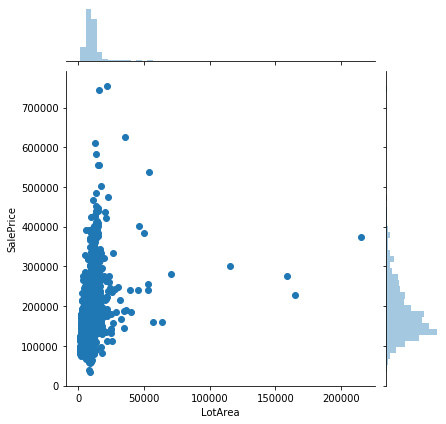

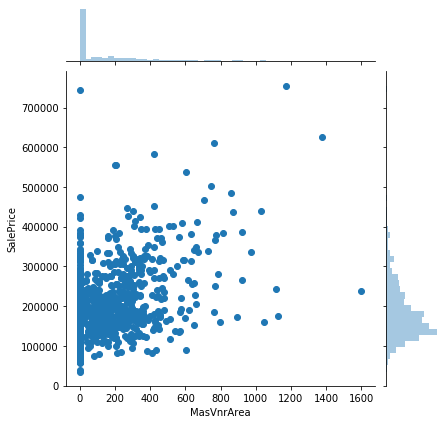

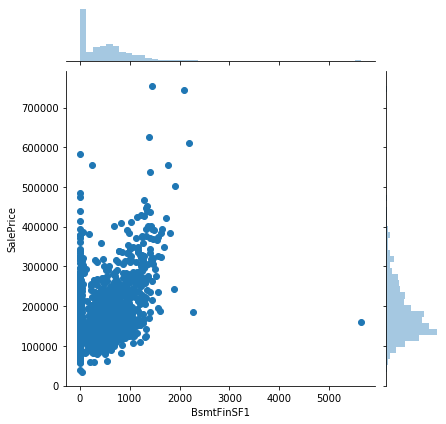

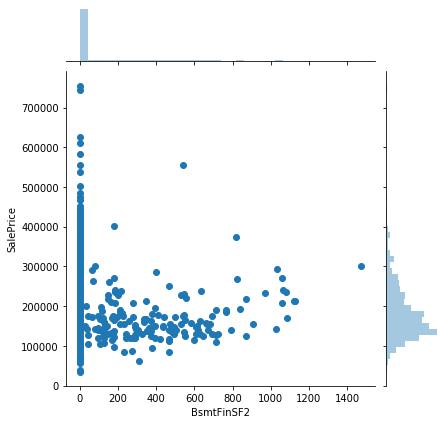

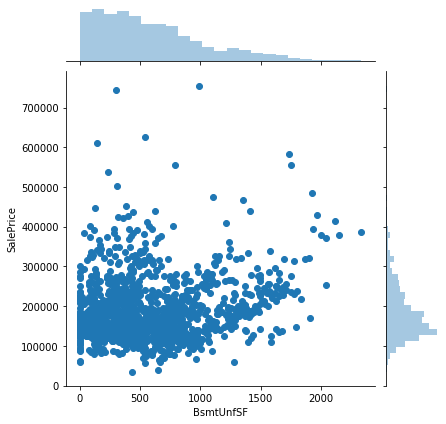

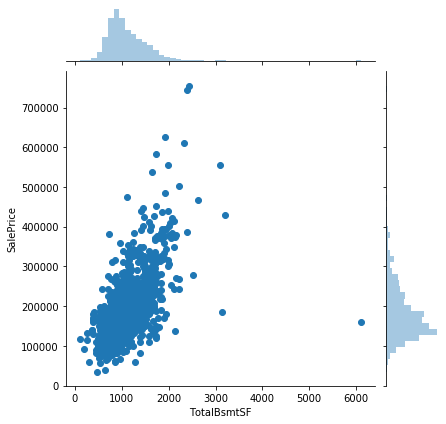

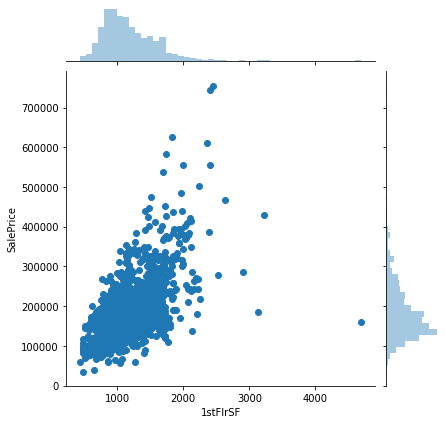

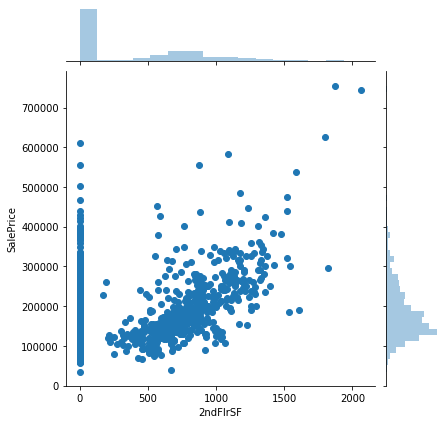

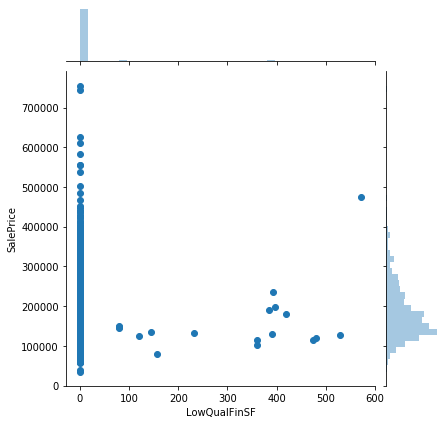

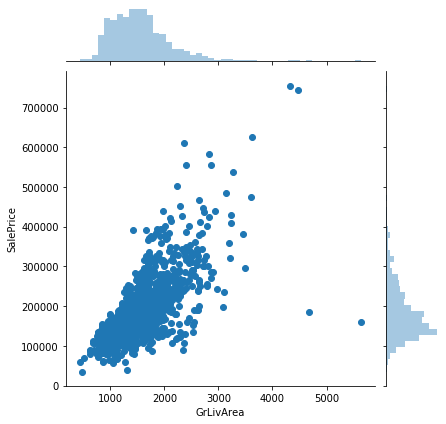

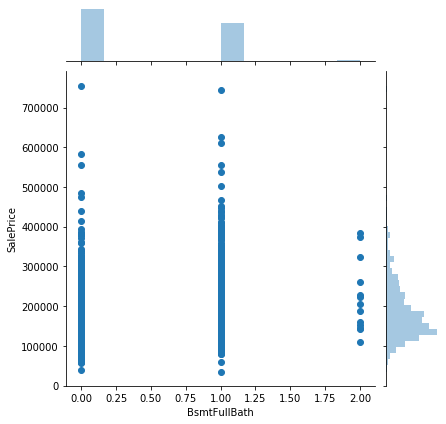

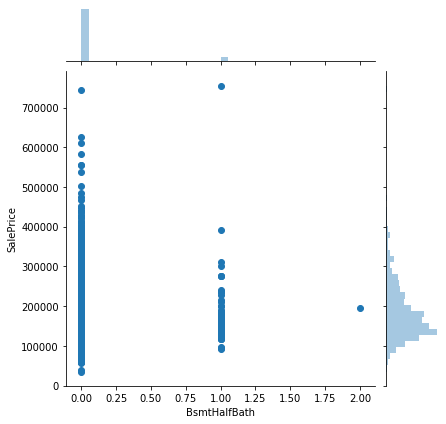

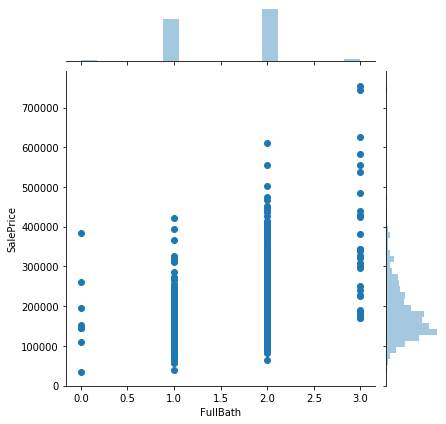

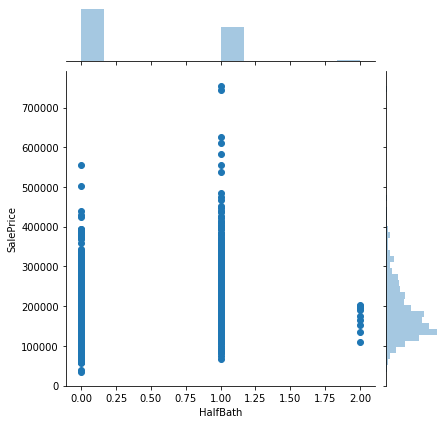

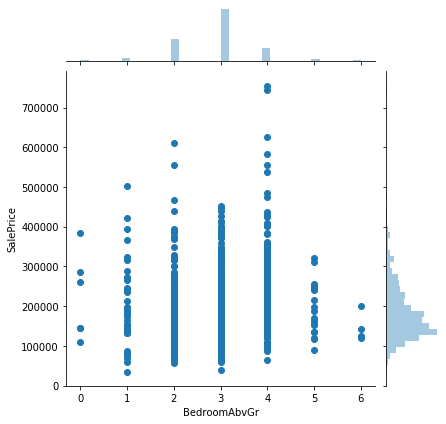

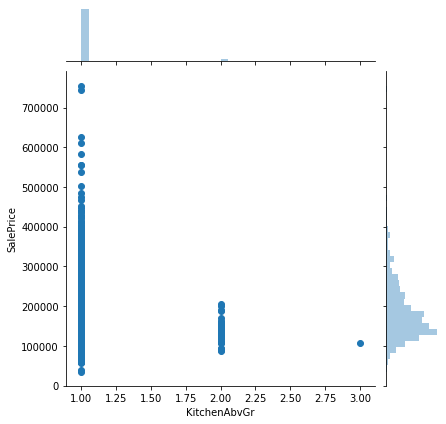

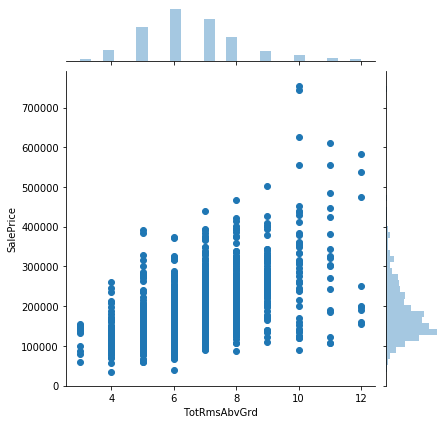

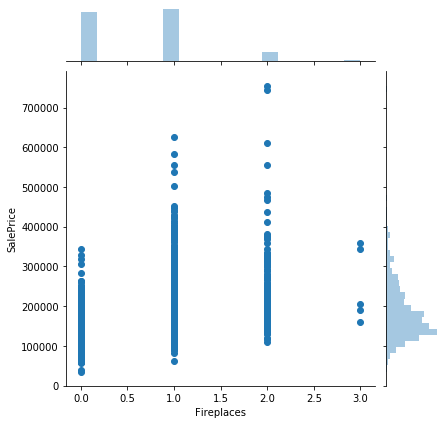

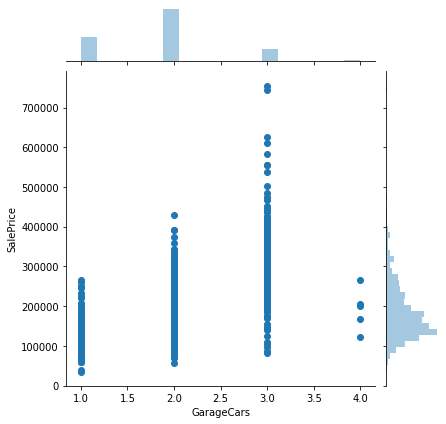

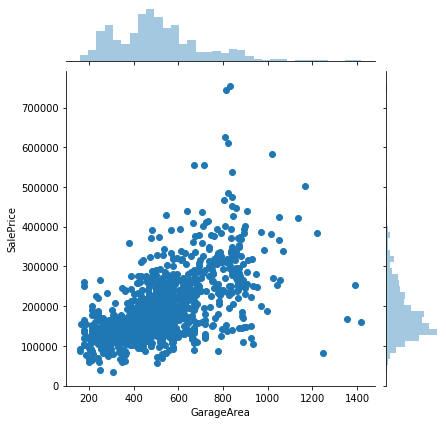

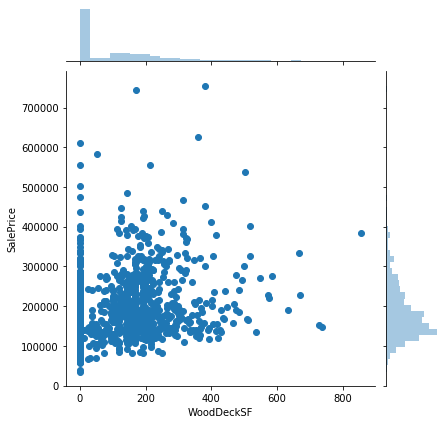

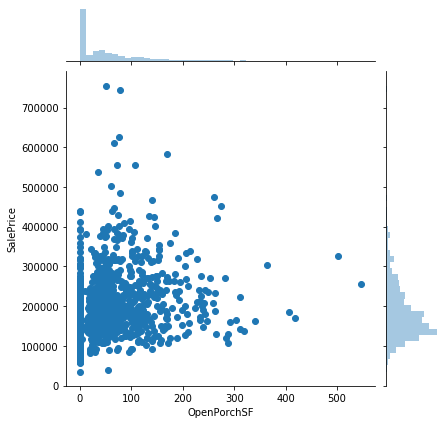

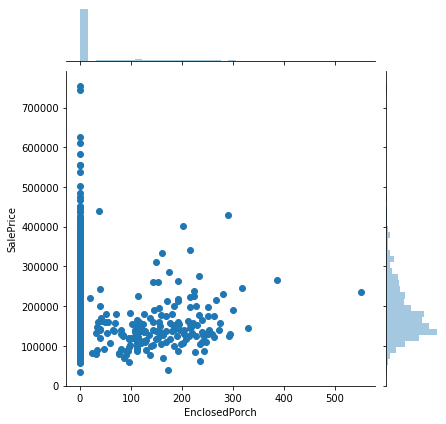

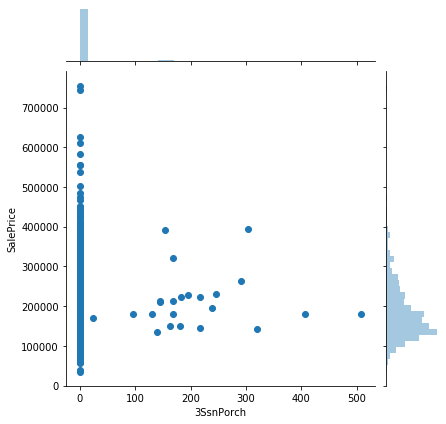

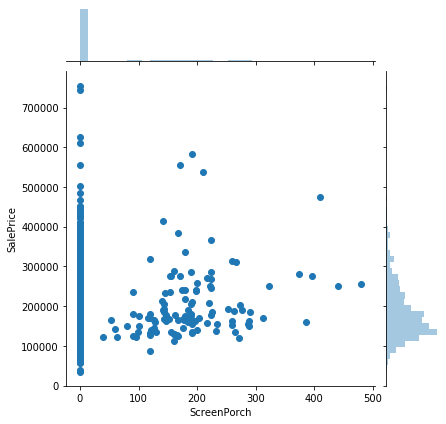

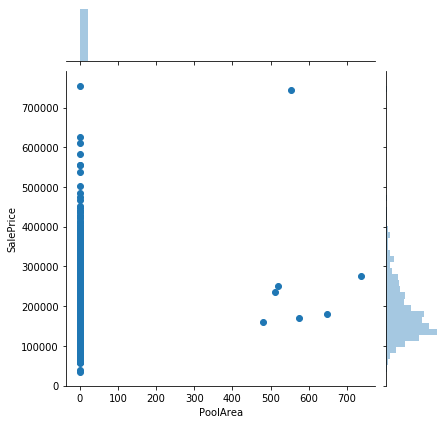

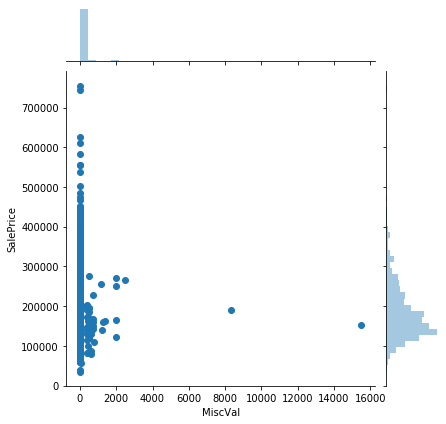

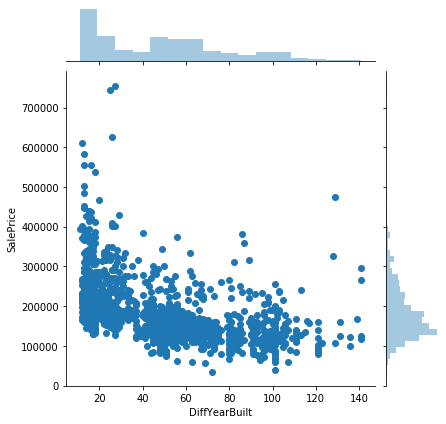

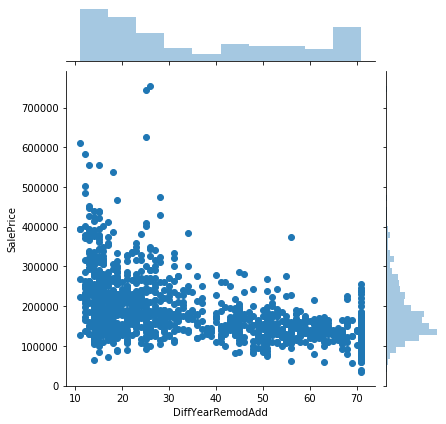

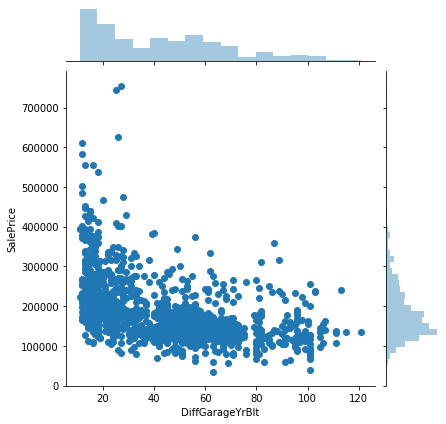

In [18]:
# NUMERICAL COLUMN ANALYSIS
for i, col in enumerate(num_col):
    num_col_analysis(i, col, out_col)

<Figure size 432x288 with 0 Axes>

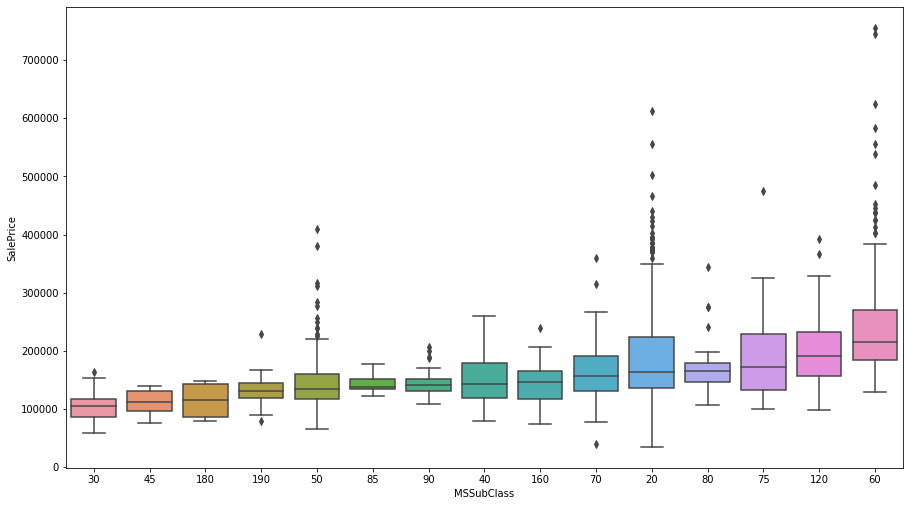

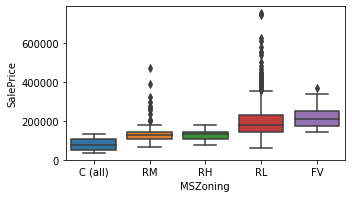

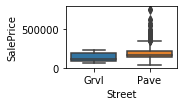

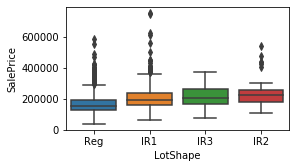

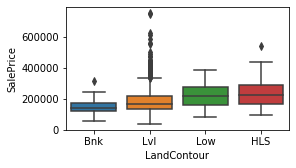

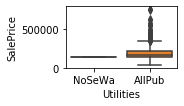

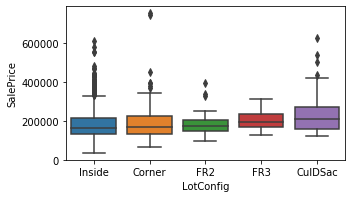

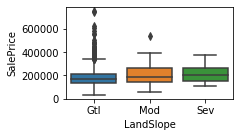

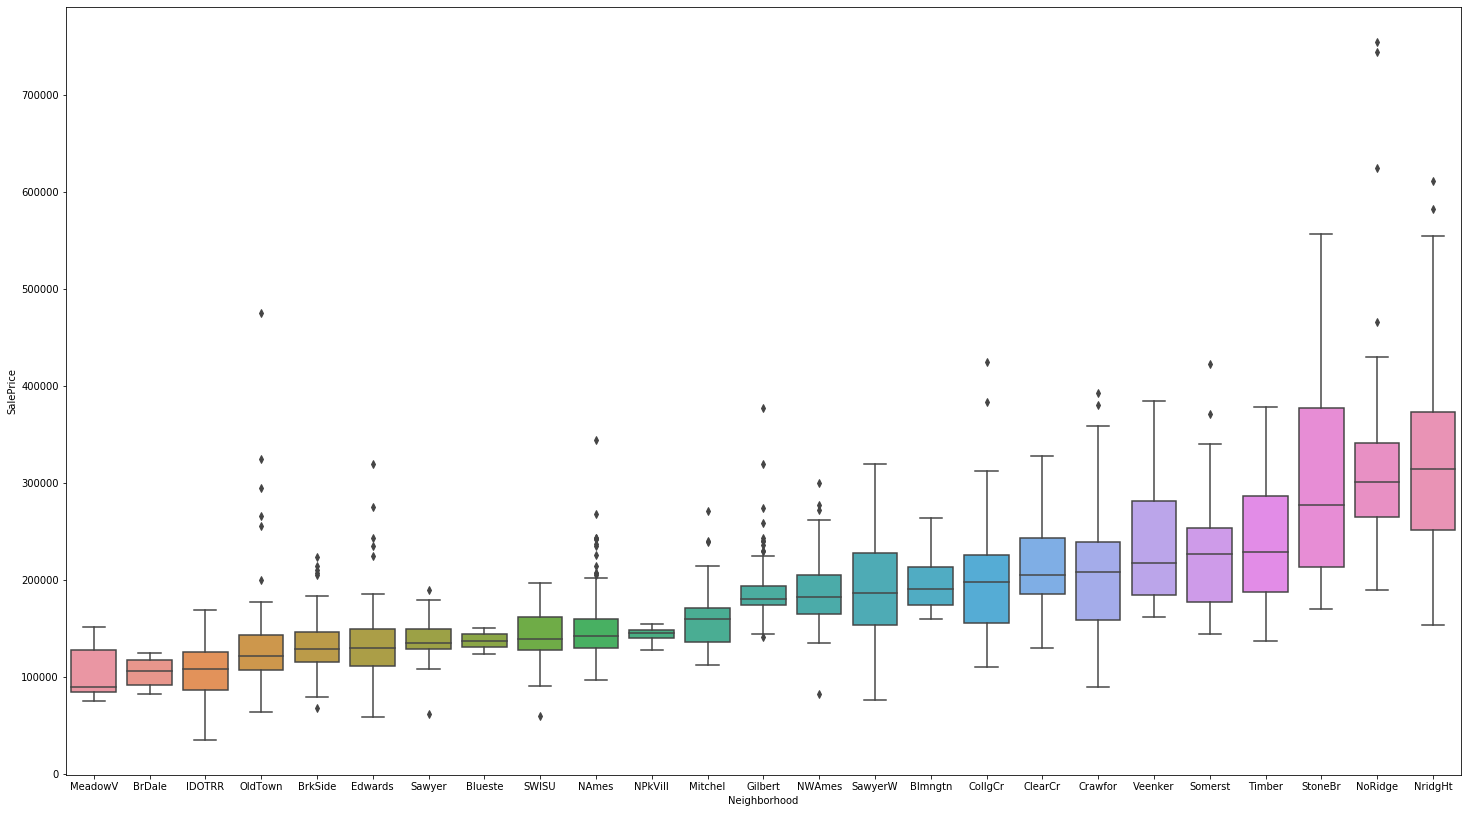

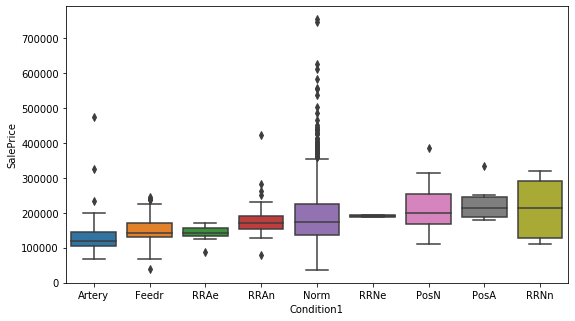

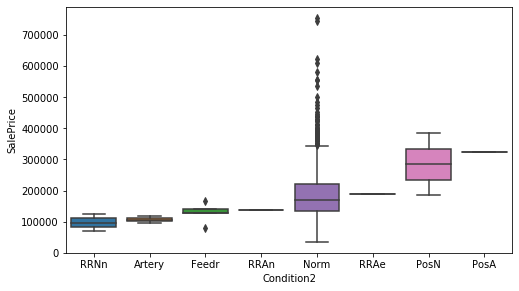

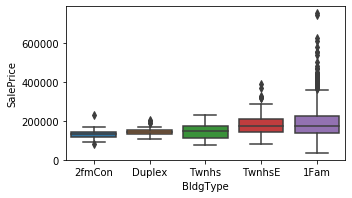

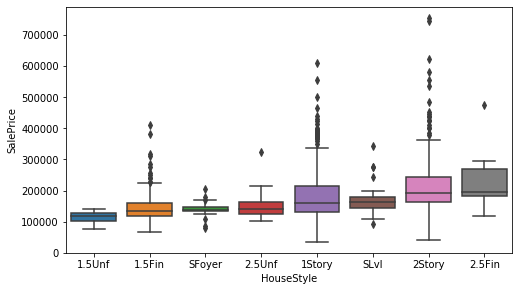

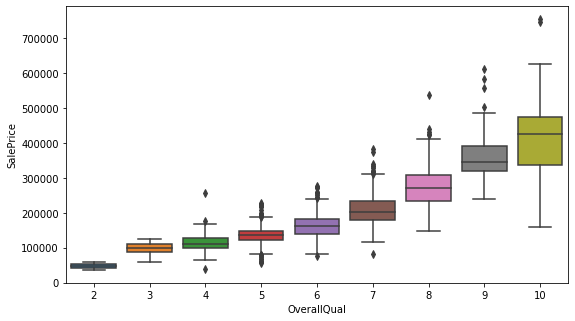

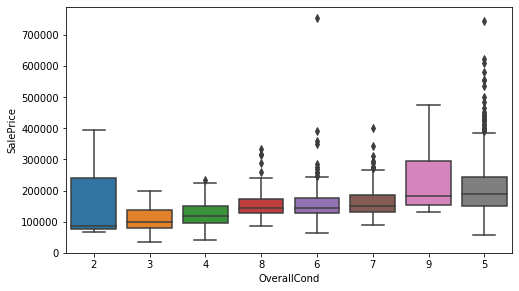

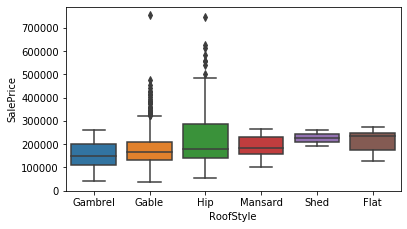

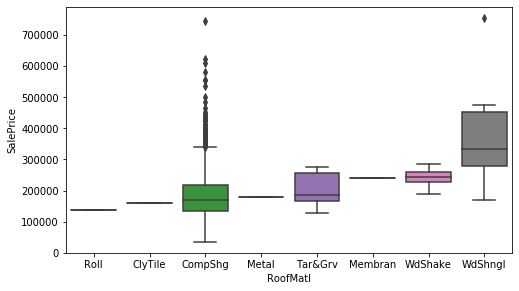

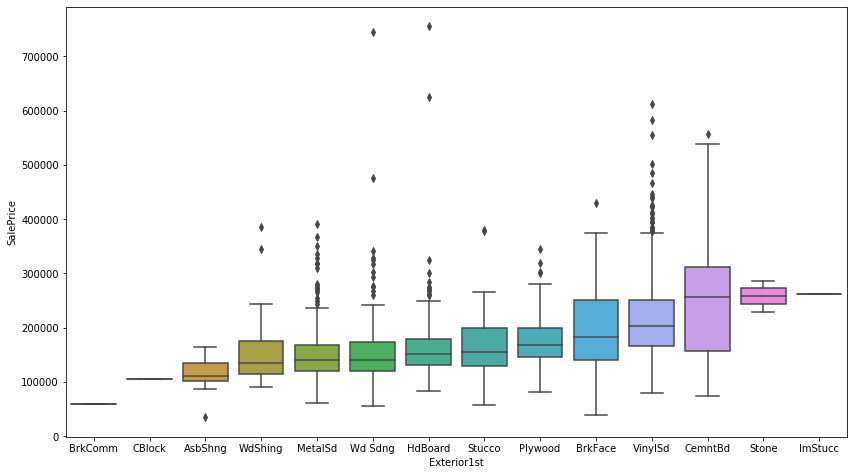

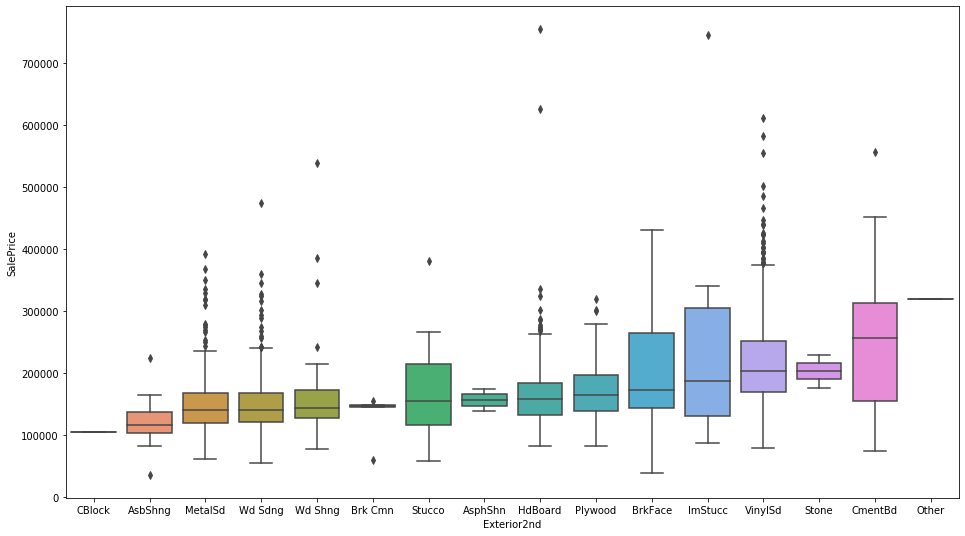

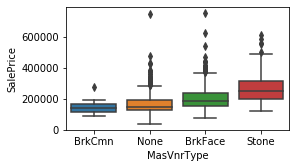

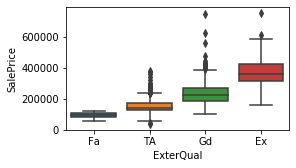

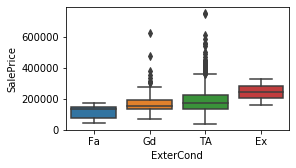

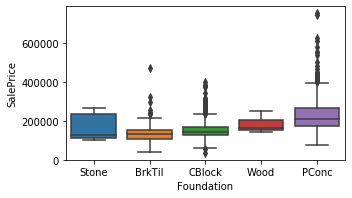

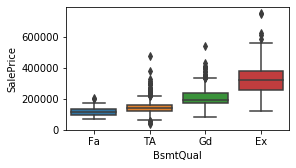

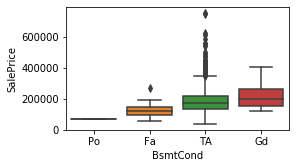

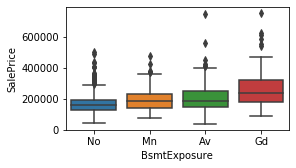

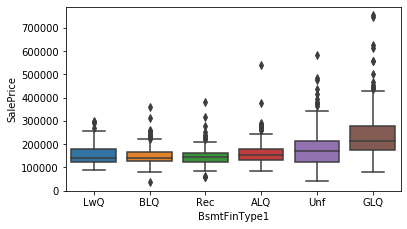

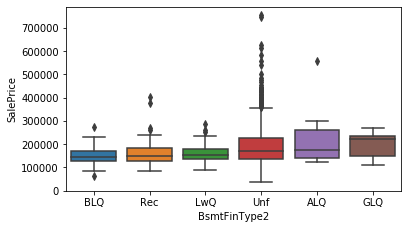

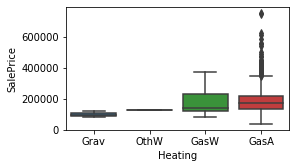

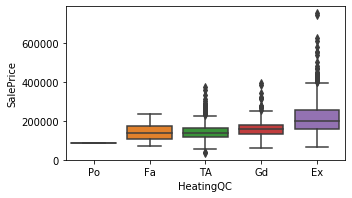

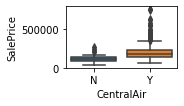

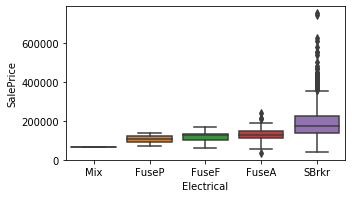

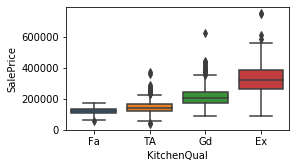

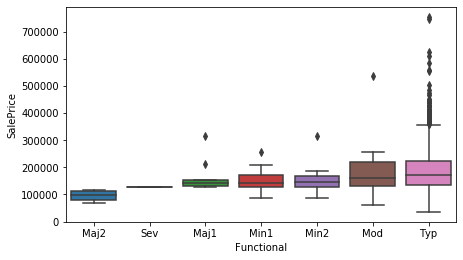

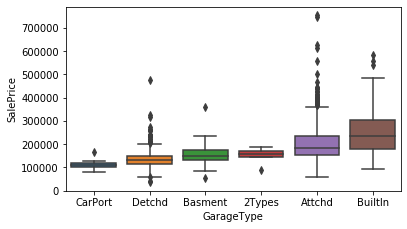

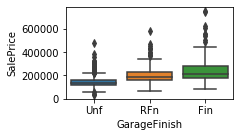

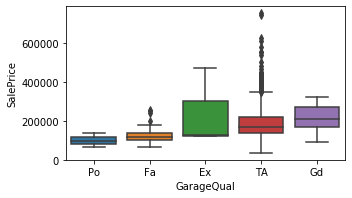

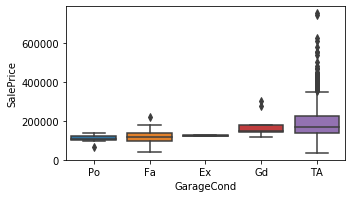

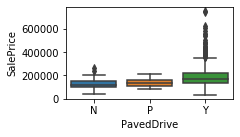

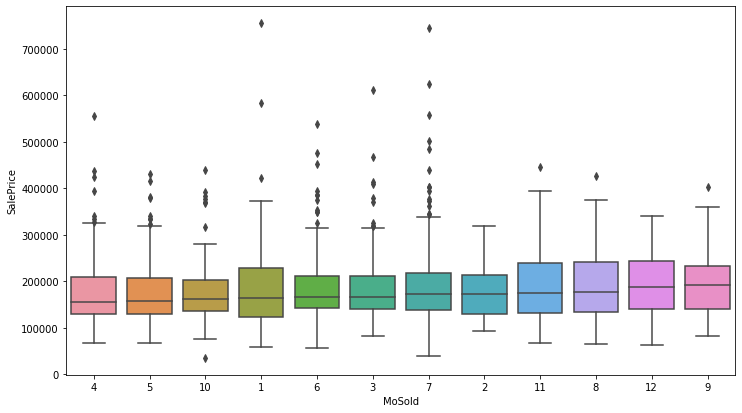

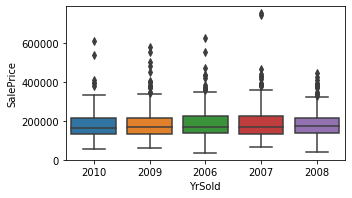

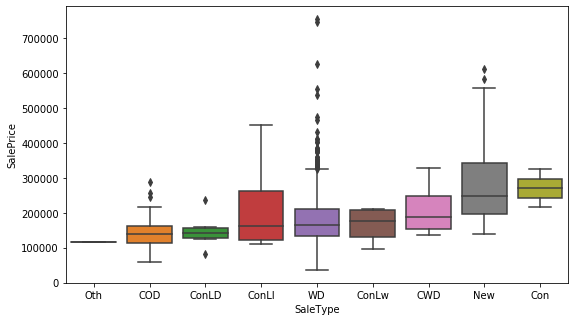

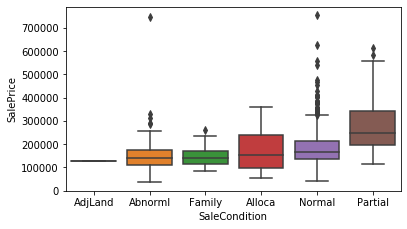

In [19]:
# CATEGORICAL COLUMN ANALYSIS
for i, col in enumerate(cat_col):
    cat_col_analysis(i, col, out_col)

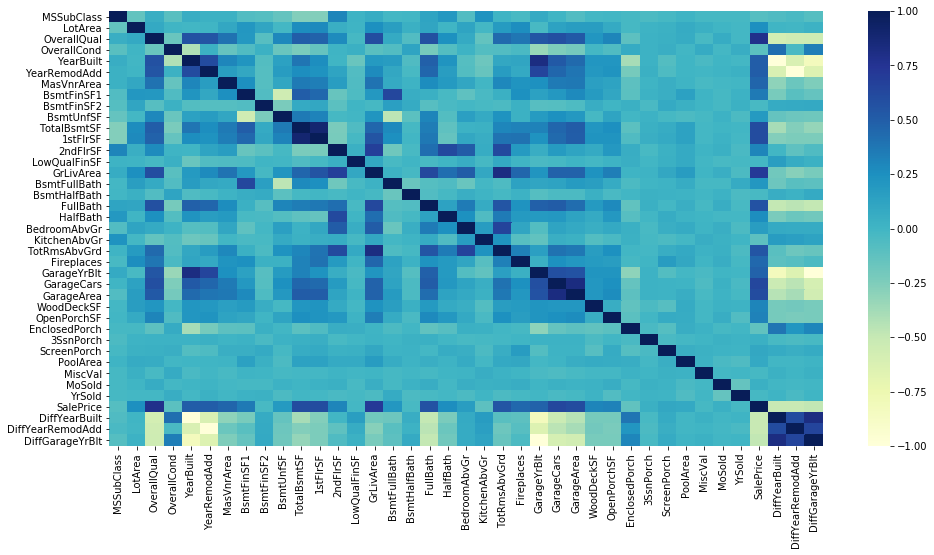

In [20]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(16,8))

# heatmap
sns.heatmap(df_data.corr(), cmap="YlGnBu", annot=False)
plt.show()

### Summary:

There plots above shows there exist some linear relationship between various columns and output column.

The heatmap is condensed however we do have collinearity in data



## Dumify Categorical Fields

In [21]:
# Dumifying all columns using a loop
for col in cat_col:
    # Let's drop the first column from dummy df using 'drop_first = True' otherwise it will get multicollinear
    dummies = pd.get_dummies(df_data[col], drop_first = True)
    # Adding prefix to dummy column names so as to identify it later
    dummies = dummies.add_prefix(f'{col}_')
    # Add the results to the original housing dataframe
    df_data = pd.concat([df_data, dummies], axis = 1)
    # Drop original categorical column as we have created the dummies for it
    df_data.drop([col], axis = 1, inplace = True)

df_data.head()

,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,8450,2003,2003,196.0,706,0,150,856,856,854,...,0,0,0,0,1,0,0,0,1,0
1,9600,1976,1976,0.0,978,0,284,1262,1262,0,...,0,0,0,0,1,0,0,0,1,0
2,11250,2001,2002,162.0,486,0,434,920,920,866,...,0,0,0,0,1,0,0,0,1,0
3,9550,1915,1970,0.0,216,0,540,756,961,756,...,0,0,0,0,1,0,0,0,0,0
4,14260,2000,2000,350.0,655,0,490,1145,1145,1053,...,0,0,0,0,1,0,0,0,1,0


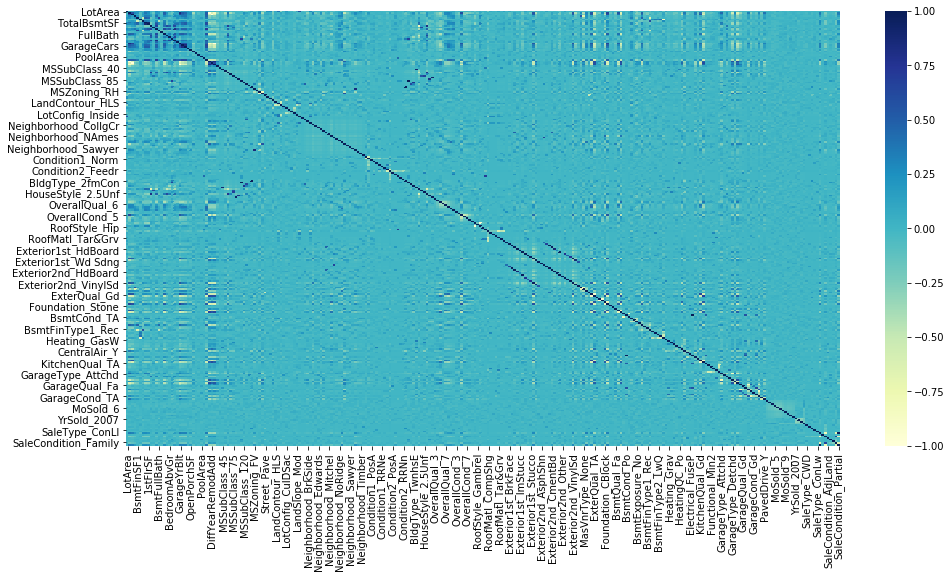

In [22]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(16,8))

# heatmap
sns.heatmap(df_data.corr(), cmap="YlGnBu", annot=False)
plt.show()

### Summary:

The heatmap is very condensed and we do have a lot of collinearity in data, hence feature selection is necessary.



## Data Preparation for Modelling

In [23]:
# Removing outliers > +3 Std. Deviation or < -3 Std. Deviation 
# Checking if outliers exist
from scipy import stats
z = np.abs(stats.zscore(df_data[num_col]))
# Outlier Removed Records
selected = df_data[num_col][(z < 3).all(axis=1)]
df_data = df_data.loc[selected.index]
df_data

,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,8450,2003,2003,196.0,706,0,150,856,856,854,...,0,0,0,0,1,0,0,0,1,0
2,11250,2001,2002,162.0,486,0,434,920,920,866,...,0,0,0,0,1,0,0,0,1,0
4,14260,2000,2000,350.0,655,0,490,1145,1145,1053,...,0,0,0,0,1,0,0,0,1,0
6,10084,2004,2005,186.0,1369,0,317,1686,1694,0,...,0,0,0,0,1,0,0,0,1,0
10,11200,1965,1965,0.0,906,0,134,1040,1040,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,9262,2008,2009,194.0,0,0,1573,1573,1578,0,...,0,0,1,0,0,0,0,0,0,1
1452,3675,2005,2005,80.0,547,0,0,547,1072,0,...,0,0,0,0,1,0,0,0,1,0
1454,7500,2004,2005,0.0,410,0,811,1221,1221,0,...,0,0,0,0,1,0,0,0,1,0
1455,7917,1999,2000,0.0,0,0,953,953,953,694,...,0,0,0,0,1,0,0,0,1,0


In [24]:
# Preparing Test and Train Set

y = df_data.loc[:, out_col]
X = df_data.loc[:, df_data.columns != out_col]

# scale
scaler = StandardScaler()
scaler.fit(X)

# split 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3, 
                                                    random_state = 1)

In [25]:
print(np.shape(X_test))

(295, 268)




## Performing Simple Linear Regression

In [26]:
# linear regression with all predictors
lm = LinearRegression()
lm.fit(X_train, y_train)

# predict train
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
# predict test
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9528333512101549
0.8984820444406533


In [27]:
# Simple Linear Regression model parameters
model_parameters = list(lm.coef_)
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
sorted(list(zip(model_parameters,cols)), key=lambda x:abs(x[0]), reverse=True)

[(-526400.178, 'constant'),
 (-63863.821, 'MSSubClass_180'),
 (62640.815, 'SaleCondition_AdjLand'),
 (-53248.349, 'MSSubClass_85'),
 (47012.779, 'HouseStyle_SFoyer'),
 (44092.321, 'OverallQual_9'),
 (-42957.4, 'SaleCondition_Alloca'),
 (42036.962, 'MSZoning_FV'),
 (39549.886, 'HouseStyle_1.5Unf'),
 (39209.612, 'OverallQual_10'),
 (-37944.635, 'MSSubClass_80'),
 (36826.987, 'Exterior2nd_CmentBd'),
 (-36522.122, 'Neighborhood_MeadowV'),
 (-35873.347, 'MSSubClass_160'),
 (-33144.306, 'Functional_Mod'),
 (30698.139, 'SaleCondition_Partial'),
 (-30551.207, 'MSSubClass_90'),
 (-30551.207, 'BldgType_Duplex'),
 (30452.485, 'HouseStyle_SLvl'),
 (30308.413, 'OverallCond_9'),
 (-29947.172, 'MSSubClass_45'),
 (-29489.098, 'RoofMatl_WdShake'),
 (29459.633, 'MSZoning_RH'),
 (27882.273, 'OverallCond_8'),
 (26553.494, 'MSZoning_RL'),
 (-26510.601, 'SaleType_ConLI'),
 (26438.286, 'Foundation_Stone'),
 (26359.862, 'Condition1_RRNn'),
 (25205.134, 'Functional_Typ'),
 (23830.594, 'Neighborhood_StoneBr'),


### Summary:

Simple Linear Regression gave us a complex model with most of the coefficients as non-zero values.

Simple Linear Regression has not helped us in the feature selection.




## Performing Ridge Regression¶

In [28]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    3.8s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [29]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.232962,0.433406,0.001202,0.000400,0.0001,{'alpha': 0.0001},-20040.256818,-17967.075903,-15258.901538,-17502.421800,...,-17617.548186,1529.194695,26,-8737.003001,-8945.166118,-9844.210751,-9291.960715,-9425.734304,-9248.814978,385.178467
1,0.015412,0.002730,0.001599,0.000797,0.001,{'alpha': 0.001},-20027.830659,-17759.392909,-15181.867438,-17467.724044,...,-17542.119424,1543.346683,25,-8739.359052,-8951.056300,-9847.929777,-9292.639738,-9427.303278,-9251.657629,384.936980
2,0.016011,0.002609,0.001201,0.000400,0.01,{'alpha': 0.01},-19898.767497,-16814.836486,-14864.608162,-17201.725579,...,-17149.796562,1610.226847,24,-8758.827889,-8991.596631,-9875.386254,-9298.375155,-9438.644122,-9272.566010,383.278214
3,0.015610,0.001201,0.000801,0.000400,0.05,{'alpha': 0.05},-19387.795251,-16084.056206,-14262.329824,-16586.477091,...,-16545.173526,1647.128680,23,-8817.485726,-9050.513803,-9951.254475,-9323.263753,-9467.278612,-9321.959274,386.084982
4,0.015010,0.001790,0.001401,0.000490,0.1,{'alpha': 0.1},-18968.234339,-15768.549106,-13827.787686,-16208.502370,...,-16164.343379,1645.145612,21,-8871.944933,-9090.693200,-10013.223890,-9357.765057,-9492.690014,-9365.263419,388.561055


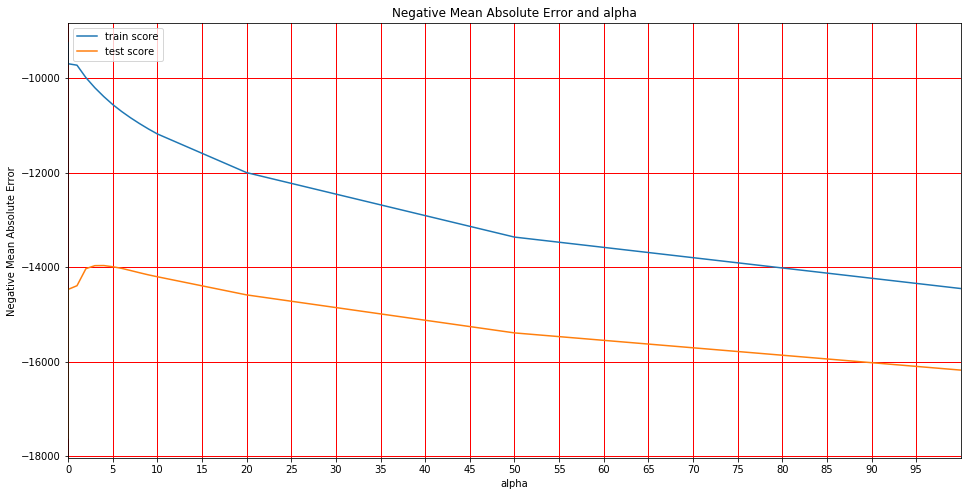

In [30]:
# plotting mean test and train Score with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.figure(figsize=(16,8))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.xlim(0, 100)
plt.xticks(np.arange(0, 100, 5))
plt.grid(color='r', linestyle='-', linewidth=1)
plt.show()

In [31]:
alpha = 4
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)

# predict
y_train_pred = ridge.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred_ridge = ridge.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred_ridge))

0.9460249894962849
0.9152898297301229


In [32]:
# ridge model parameters
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
sorted(list(zip(model_parameters,cols)), key=lambda x:abs(x[0]), reverse=True)

[(-484787.162, 'constant'),
 (26508.528, 'OverallQual_9'),
 (21072.822, 'Neighborhood_StoneBr'),
 (-17360.768, 'KitchenQual_Gd'),
 (17017.168, 'Functional_Typ'),
 (-16934.519, 'KitchenQual_TA'),
 (16306.799, 'Neighborhood_Crawfor'),
 (-15955.873, 'Functional_Mod'),
 (-15133.388, 'Neighborhood_MeadowV'),
 (-12748.031, 'SaleCondition_Alloca'),
 (12522.33, 'Exterior1st_BrkFace'),
 (11717.671, 'SaleCondition_Partial'),
 (-11558.389, 'OverallCond_3'),
 (-10949.877, 'Condition1_RRAe'),
 (-10826.345, 'MSSubClass_160'),
 (10825.35, 'BsmtExposure_Gd'),
 (-10550.902, 'Neighborhood_Edwards'),
 (-10502.732, 'KitchenQual_Fa'),
 (10327.416, 'MSZoning_FV'),
 (10207.03, 'OverallQual_10'),
 (-9935.215, 'OverallQual_4'),
 (9581.424, 'OverallCond_8'),
 (-9395.542, 'OverallQual_6'),
 (8705.198, 'BsmtFinType1_GLQ'),
 (8551.531, 'MasVnrType_Stone'),
 (-8479.422, 'BsmtQual_Gd'),
 (8322.03, 'Neighborhood_BrDale'),
 (8248.003, 'Condition1_Norm'),
 (-8213.917, 'BsmtQual_TA'),
 (-8094.663, 'Neighborhood_NWAmes')

### Summary:

Ridge regression gave us a complex model with most of the coefficients as non-zero values.

Ridge regression has not helped us in the feature selection.



## Performing Lasso Regression

In [33]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:   53.2s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [34]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.361430,0.104319,0.001001,0.000001,0.0001,{'alpha': 0.0001},-20354.989290,-17139.509653,-15146.586233,-17522.701449,...,-17488.394597,1667.875389,27,-8739.546114,-8997.068544,-9855.239799,-9294.859731,-9430.943130,-9263.531464,380.707240
1,0.313608,0.026021,0.001201,0.000400,0.001,{'alpha': 0.001},-20351.941084,-17131.209484,-15144.100412,-17519.524150,...,-17483.902840,1667.998738,26,-8739.570861,-8997.070072,-9855.245437,-9294.846648,-9430.947550,-9263.536114,380.702141
2,0.305003,0.009792,0.001602,0.000490,0.01,{'alpha': 0.01},-20322.990556,-17056.620745,-15118.840954,-17486.896703,...,-17440.739128,1669.629721,25,-8739.937154,-8997.225114,-9855.416348,-9294.854997,-9431.030123,-9263.692747,380.640152
3,0.325017,0.031379,0.001402,0.000490,0.05,{'alpha': 0.05},-20303.619698,-16981.060842,-15078.585628,-17415.147825,...,-17357.416971,1684.129388,24,-8741.822025,-8998.252448,-9857.015693,-9295.137387,-9431.705720,-9264.786655,380.539318
4,0.318412,0.024144,0.001201,0.000400,0.1,{'alpha': 0.1},-20264.859289,-16955.900975,-15028.055928,-17393.540778,...,-17310.658823,1689.501576,23,-8744.295160,-8999.585884,-9859.435085,-9295.617117,-9432.800541,-9266.346758,380.530318


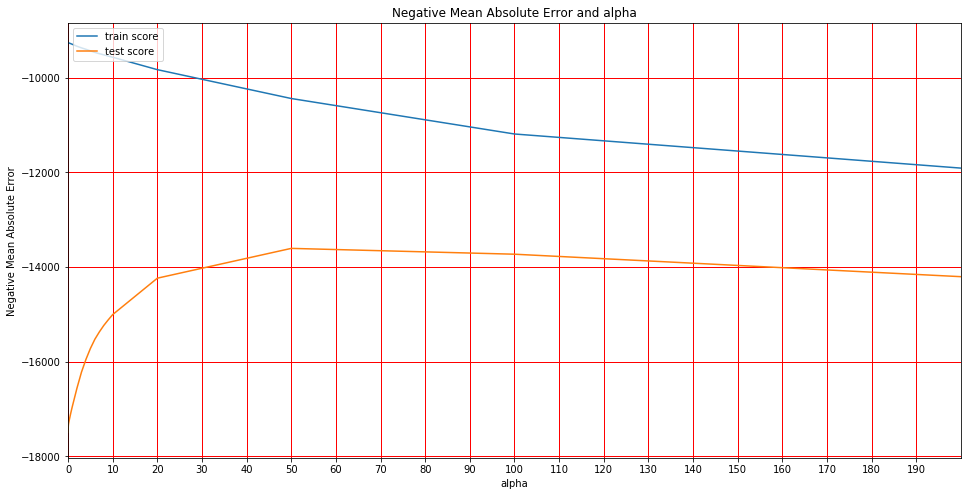

In [35]:
# plotting mean test and train Score with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.figure(figsize=(16,8))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.xlim(0, 200)
plt.xticks(np.arange(0, 200, 10))
plt.grid(color='r', linestyle='-', linewidth=1)
plt.show()

In [36]:
alpha =50
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train) 

# predict
y_train_pred = lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred_lasso = lasso.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred_lasso))

0.9451804944627856
0.9145348792017315


In [37]:
print(np.shape(X_test))

(295, 268)


In [38]:
# lasso model parameters
model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
lasso_selected_features = []
for k,v in sorted(list(zip(model_parameters,cols)), key=lambda x:abs(x[0]), reverse=True)[1:31]:
    lasso_selected_features.append(v)
sorted(list(zip(model_parameters,cols)), key=lambda x:abs(x[0]), reverse=True)

[(-1749883.891, 'constant'),
 (44090.81, 'OverallQual_9'),
 (28811.319, 'OverallQual_10'),
 (-28616.24, 'SaleCondition_Alloca'),
 (27458.272, 'Neighborhood_StoneBr'),
 (-27408.595, 'Functional_Mod'),
 (23028.136, 'Neighborhood_Crawfor'),
 (-22777.991, 'Neighborhood_MeadowV'),
 (-19807.934, 'KitchenQual_TA'),
 (-19293.312, 'KitchenQual_Gd'),
 (18086.014, 'SaleCondition_Partial'),
 (17443.443, 'Exterior1st_BrkFace'),
 (15927.706, 'Functional_Typ'),
 (15336.547, 'OverallQual_8'),
 (-14376.206, 'Condition1_RRAe'),
 (-13807.831, 'KitchenQual_Fa'),
 (-13204.071, 'MSSubClass_160'),
 (12439.447, 'BsmtExposure_Gd'),
 (10677.755, 'MSZoning_FV'),
 (10541.689, 'Neighborhood_NoRidge'),
 (10172.209, 'Neighborhood_BrkSide'),
 (9456.502, 'OverallCond_8'),
 (8633.016, 'MasVnrType_Stone'),
 (8270.356, 'Exterior1st_CemntBd'),
 (-8254.628, 'OverallCond_3'),
 (8002.555, 'BsmtFinType1_GLQ'),
 (-7815.645, 'Neighborhood_Edwards'),
 (-7740.807, 'OverallCond_5'),
 (6881.349, 'Condition1_Norm'),
 (-6532.466, 'Bs

### Summary:

Lasso Regression gave us a simpler model with most of the coefficients as zero values.

Lasso Regression has helped us in the feature selection.



## Automated selection of Predictors (RFE)

In [39]:
# Running RFE with the output number of the variable equal to 30
rfe = RFE(lm, 30)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [40]:
# Listing out the top 30 columns that are selected in RFE (Automated selection of Predictors)
auto_selected_predictors = X_train.columns[rfe.support_]
auto_selected_predictors

Index(['YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'GarageYrBlt', 'DiffYearBuilt', 'DiffYearRemodAdd',
       'DiffGarageYrBlt', 'MSSubClass_75', 'MSSubClass_90', 'MSZoning_FV',
       'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'BldgType_Duplex',
       'HouseStyle_2.5Unf', 'OverallQual_3', 'OverallQual_4', 'OverallQual_5',
       'OverallQual_6', 'Foundation_Stone', 'GarageQual_Fa', 'GarageQual_Gd',
       'GarageQual_TA', 'GarageCond_Fa', 'GarageCond_Gd', 'GarageCond_Po',
       'GarageCond_TA'],
      dtype='object')

In [41]:
# Function to take the column names as parameter and create a model along with displaying its statistics
def make_lr_model_mp(cols):
    cols=list(cols)
        
    # Add a constant
    X_train_lm = sm.add_constant(X_train[cols])
    
    # Create a first fitted model
    lr = sm.OLS(y_train, X_train_lm).fit()
    
    # Check the parameters obtained
    print('='*78)
    print(f'Parameters obtained for {cols}')
    print('='*78)
    print(lr.params)
    print('='*78,'\n')
    
    # Print a summary of the linear regression model obtained
    print('='*78)
    print(lr.summary())
    print('='*78,'\n')
    
    # Create a dataframe that will contain the names of all the feature variables and their respective VIFs
    print('='*78)
    print(f'Computing VIF values to keep track of multicollinearity')
    print('='*78)
    vif = pd.DataFrame()
    vif['Features'] = X_train[cols].columns
    vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)
    print('='*78)

In [42]:
# MODEL 1
# Let's consider all the columns selected by RFE for our first model
make_lr_model_mp(list(df_data[auto_selected_predictors]))

Parameters obtained for ['YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageYrBlt', 'DiffYearBuilt', 'DiffYearRemodAdd', 'DiffGarageYrBlt', 'MSSubClass_75', 'MSSubClass_90', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'BldgType_Duplex', 'HouseStyle_2.5Unf', 'OverallQual_3', 'OverallQual_4', 'OverallQual_5', 'OverallQual_6', 'Foundation_Stone', 'GarageQual_Fa', 'GarageQual_Gd', 'GarageQual_TA', 'GarageCond_Fa', 'GarageCond_Gd', 'GarageCond_Po', 'GarageCond_TA']
const                   -0.120160
YearBuilt              113.759563
YearRemodAdd            -0.498428
1stFlrSF               140.691969
2ndFlrSF                98.219334
LowQualFinSF          -262.238511
GrLivArea              -23.327208
GarageYrBlt            -84.310669
DiffYearBuilt         -356.602560
DiffYearRemodAdd      -242.344569
DiffGarageYrBlt       -158.532327
MSSubClass_75          673.856034
MSSubClass_90        -1233.423194
MSZoning_FV          40923.838020
MSZon

In [43]:
# MODEL 2
# Let's consider all the columns selected by Lasso for our second model
make_lr_model_mp(list(df_data[lasso_selected_features]))

Parameters obtained for ['OverallQual_9', 'OverallQual_10', 'SaleCondition_Alloca', 'Neighborhood_StoneBr', 'Functional_Mod', 'Neighborhood_Crawfor', 'Neighborhood_MeadowV', 'KitchenQual_TA', 'KitchenQual_Gd', 'SaleCondition_Partial', 'Exterior1st_BrkFace', 'Functional_Typ', 'OverallQual_8', 'Condition1_RRAe', 'KitchenQual_Fa', 'MSSubClass_160', 'BsmtExposure_Gd', 'MSZoning_FV', 'Neighborhood_NoRidge', 'Neighborhood_BrkSide', 'OverallCond_8', 'MasVnrType_Stone', 'Exterior1st_CemntBd', 'OverallCond_3', 'BsmtFinType1_GLQ', 'Neighborhood_Edwards', 'OverallCond_5', 'Condition1_Norm', 'BsmtQual_TA', 'GarageCond_Fa']
const                    211555.786196
OverallQual_9             91607.338623
OverallQual_10            72474.274804
SaleCondition_Alloca     -64806.887443
Neighborhood_StoneBr      32001.856483
Functional_Mod            -6000.629520
Neighborhood_Crawfor      40134.212919
Neighborhood_MeadowV     -76764.002034
KitchenQual_TA           -64442.203727
KitchenQual_Gd           -4029

In [44]:
# MODEL 3
# We got better VIF values with the features selected by Lasso, hence refining the model based on KPIs.
lasso_selected_features.remove('Functional_Typ')
make_lr_model_mp(list(df_data[lasso_selected_features]))

Parameters obtained for ['OverallQual_9', 'OverallQual_10', 'SaleCondition_Alloca', 'Neighborhood_StoneBr', 'Functional_Mod', 'Neighborhood_Crawfor', 'Neighborhood_MeadowV', 'KitchenQual_TA', 'KitchenQual_Gd', 'SaleCondition_Partial', 'Exterior1st_BrkFace', 'OverallQual_8', 'Condition1_RRAe', 'KitchenQual_Fa', 'MSSubClass_160', 'BsmtExposure_Gd', 'MSZoning_FV', 'Neighborhood_NoRidge', 'Neighborhood_BrkSide', 'OverallCond_8', 'MasVnrType_Stone', 'Exterior1st_CemntBd', 'OverallCond_3', 'BsmtFinType1_GLQ', 'Neighborhood_Edwards', 'OverallCond_5', 'Condition1_Norm', 'BsmtQual_TA', 'GarageCond_Fa']
const                    211932.673435
OverallQual_9             91627.401478
OverallQual_10            72494.448562
SaleCondition_Alloca     -64793.601281
Neighborhood_StoneBr      31976.977889
Functional_Mod            -6356.819275
Neighborhood_Crawfor      40138.519223
Neighborhood_MeadowV     -76703.816419
KitchenQual_TA           -64446.979291
KitchenQual_Gd           -40287.996529
SaleCondi

In [45]:
# MODEL 4
lasso_selected_features.remove('Functional_Mod')
make_lr_model_mp(list(df_data[lasso_selected_features]))

Parameters obtained for ['OverallQual_9', 'OverallQual_10', 'SaleCondition_Alloca', 'Neighborhood_StoneBr', 'Neighborhood_Crawfor', 'Neighborhood_MeadowV', 'KitchenQual_TA', 'KitchenQual_Gd', 'SaleCondition_Partial', 'Exterior1st_BrkFace', 'OverallQual_8', 'Condition1_RRAe', 'KitchenQual_Fa', 'MSSubClass_160', 'BsmtExposure_Gd', 'MSZoning_FV', 'Neighborhood_NoRidge', 'Neighborhood_BrkSide', 'OverallCond_8', 'MasVnrType_Stone', 'Exterior1st_CemntBd', 'OverallCond_3', 'BsmtFinType1_GLQ', 'Neighborhood_Edwards', 'OverallCond_5', 'Condition1_Norm', 'BsmtQual_TA', 'GarageCond_Fa']
const                    211854.098572
OverallQual_9             91646.311525
OverallQual_10            72507.796095
SaleCondition_Alloca     -64714.770585
Neighborhood_StoneBr      31955.375853
Neighborhood_Crawfor      40179.705046
Neighborhood_MeadowV     -76466.582073
KitchenQual_TA           -64509.499322
KitchenQual_Gd           -40265.705617
SaleCondition_Partial     23492.508700
Exterior1st_BrkFace       3

In [46]:
# MODEL 5
lasso_selected_features.remove('OverallCond_8')
make_lr_model_mp(list(df_data[lasso_selected_features]))

Parameters obtained for ['OverallQual_9', 'OverallQual_10', 'SaleCondition_Alloca', 'Neighborhood_StoneBr', 'Neighborhood_Crawfor', 'Neighborhood_MeadowV', 'KitchenQual_TA', 'KitchenQual_Gd', 'SaleCondition_Partial', 'Exterior1st_BrkFace', 'OverallQual_8', 'Condition1_RRAe', 'KitchenQual_Fa', 'MSSubClass_160', 'BsmtExposure_Gd', 'MSZoning_FV', 'Neighborhood_NoRidge', 'Neighborhood_BrkSide', 'MasVnrType_Stone', 'Exterior1st_CemntBd', 'OverallCond_3', 'BsmtFinType1_GLQ', 'Neighborhood_Edwards', 'OverallCond_5', 'Condition1_Norm', 'BsmtQual_TA', 'GarageCond_Fa']
const                    212926.722456
OverallQual_9             91357.734121
OverallQual_10            72242.997361
SaleCondition_Alloca     -64645.189868
Neighborhood_StoneBr      31791.000668
Neighborhood_Crawfor      40575.190078
Neighborhood_MeadowV     -75862.432497
KitchenQual_TA           -65002.186502
KitchenQual_Gd           -40595.949699
SaleCondition_Partial     23433.923444
Exterior1st_BrkFace       33688.408672
Overa

In [47]:
# MODEL 6
lasso_selected_features.remove('Neighborhood_BrkSide')
make_lr_model_mp(list(df_data[lasso_selected_features]))

Parameters obtained for ['OverallQual_9', 'OverallQual_10', 'SaleCondition_Alloca', 'Neighborhood_StoneBr', 'Neighborhood_Crawfor', 'Neighborhood_MeadowV', 'KitchenQual_TA', 'KitchenQual_Gd', 'SaleCondition_Partial', 'Exterior1st_BrkFace', 'OverallQual_8', 'Condition1_RRAe', 'KitchenQual_Fa', 'MSSubClass_160', 'BsmtExposure_Gd', 'MSZoning_FV', 'Neighborhood_NoRidge', 'MasVnrType_Stone', 'Exterior1st_CemntBd', 'OverallCond_3', 'BsmtFinType1_GLQ', 'Neighborhood_Edwards', 'OverallCond_5', 'Condition1_Norm', 'BsmtQual_TA', 'GarageCond_Fa']
const                    212474.326162
OverallQual_9             91460.977335
OverallQual_10            72472.257771
SaleCondition_Alloca     -63815.691357
Neighborhood_StoneBr      31863.853414
Neighborhood_Crawfor      40948.066014
Neighborhood_MeadowV     -75456.612663
KitchenQual_TA           -65061.358070
KitchenQual_Gd           -40405.521254
SaleCondition_Partial     23446.854316
Exterior1st_BrkFace       34014.610266
OverallQual_8             399

In [48]:
# MODEL 7
lasso_selected_features.remove('MSZoning_FV')
make_lr_model_mp(list(df_data[lasso_selected_features]))

Parameters obtained for ['OverallQual_9', 'OverallQual_10', 'SaleCondition_Alloca', 'Neighborhood_StoneBr', 'Neighborhood_Crawfor', 'Neighborhood_MeadowV', 'KitchenQual_TA', 'KitchenQual_Gd', 'SaleCondition_Partial', 'Exterior1st_BrkFace', 'OverallQual_8', 'Condition1_RRAe', 'KitchenQual_Fa', 'MSSubClass_160', 'BsmtExposure_Gd', 'Neighborhood_NoRidge', 'MasVnrType_Stone', 'Exterior1st_CemntBd', 'OverallCond_3', 'BsmtFinType1_GLQ', 'Neighborhood_Edwards', 'OverallCond_5', 'Condition1_Norm', 'BsmtQual_TA', 'GarageCond_Fa']
const                    212090.098373
OverallQual_9             91693.159249
OverallQual_10            73443.100653
SaleCondition_Alloca     -63875.269308
Neighborhood_StoneBr      30357.730124
Neighborhood_Crawfor      40847.901932
Neighborhood_MeadowV     -77755.465273
KitchenQual_TA           -64873.284473
KitchenQual_Gd           -39842.292811
SaleCondition_Partial     24010.594905
Exterior1st_BrkFace       34120.910180
OverallQual_8             40185.141358
Condi

In [49]:
# MODEL 8
lasso_selected_features.remove('Condition1_Norm')
make_lr_model_mp(list(df_data[lasso_selected_features]))

Parameters obtained for ['OverallQual_9', 'OverallQual_10', 'SaleCondition_Alloca', 'Neighborhood_StoneBr', 'Neighborhood_Crawfor', 'Neighborhood_MeadowV', 'KitchenQual_TA', 'KitchenQual_Gd', 'SaleCondition_Partial', 'Exterior1st_BrkFace', 'OverallQual_8', 'Condition1_RRAe', 'KitchenQual_Fa', 'MSSubClass_160', 'BsmtExposure_Gd', 'Neighborhood_NoRidge', 'MasVnrType_Stone', 'Exterior1st_CemntBd', 'OverallCond_3', 'BsmtFinType1_GLQ', 'Neighborhood_Edwards', 'OverallCond_5', 'BsmtQual_TA', 'GarageCond_Fa']
const                    216603.780767
OverallQual_9             91646.914523
OverallQual_10            73667.690253
SaleCondition_Alloca     -62617.702106
Neighborhood_StoneBr      30649.441876
Neighborhood_Crawfor      41139.872407
Neighborhood_MeadowV     -77277.730201
KitchenQual_TA           -65116.568862
KitchenQual_Gd           -39921.589684
SaleCondition_Partial     23921.682325
Exterior1st_BrkFace       33763.124187
OverallQual_8             40214.451337
Condition1_RRAe         

In [50]:
# MODEL 9
lasso_selected_features.remove('OverallCond_5')
make_lr_model_mp(list(df_data[lasso_selected_features]))

Parameters obtained for ['OverallQual_9', 'OverallQual_10', 'SaleCondition_Alloca', 'Neighborhood_StoneBr', 'Neighborhood_Crawfor', 'Neighborhood_MeadowV', 'KitchenQual_TA', 'KitchenQual_Gd', 'SaleCondition_Partial', 'Exterior1st_BrkFace', 'OverallQual_8', 'Condition1_RRAe', 'KitchenQual_Fa', 'MSSubClass_160', 'BsmtExposure_Gd', 'Neighborhood_NoRidge', 'MasVnrType_Stone', 'Exterior1st_CemntBd', 'OverallCond_3', 'BsmtFinType1_GLQ', 'Neighborhood_Edwards', 'BsmtQual_TA', 'GarageCond_Fa']
const                    220273.194346
OverallQual_9             92312.525236
OverallQual_10            74317.288936
SaleCondition_Alloca     -62669.002130
Neighborhood_StoneBr      29610.248933
Neighborhood_Crawfor      39487.910338
Neighborhood_MeadowV     -78764.789055
KitchenQual_TA           -64974.260017
KitchenQual_Gd           -39760.651420
SaleCondition_Partial     24752.541616
Exterior1st_BrkFace       32933.835323
OverallQual_8             40985.372071
Condition1_RRAe          -24666.780718
Ki

The present model seems fine in terms of p-value and VIF. Adjusted R-square is also .775

In [51]:
# final model parameters
lasso_selected_features

['OverallQual_9',
 'OverallQual_10',
 'SaleCondition_Alloca',
 'Neighborhood_StoneBr',
 'Neighborhood_Crawfor',
 'Neighborhood_MeadowV',
 'KitchenQual_TA',
 'KitchenQual_Gd',
 'SaleCondition_Partial',
 'Exterior1st_BrkFace',
 'OverallQual_8',
 'Condition1_RRAe',
 'KitchenQual_Fa',
 'MSSubClass_160',
 'BsmtExposure_Gd',
 'Neighborhood_NoRidge',
 'MasVnrType_Stone',
 'Exterior1st_CemntBd',
 'OverallCond_3',
 'BsmtFinType1_GLQ',
 'Neighborhood_Edwards',
 'BsmtQual_TA',
 'GarageCond_Fa']





## Visualization and Conclusion of final model

Text(0, 0.5, 'Sales Price')

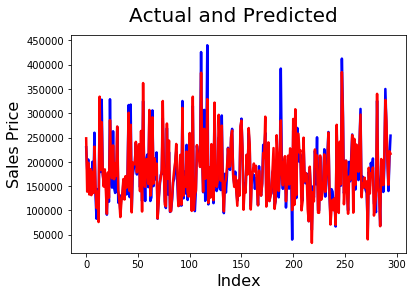

In [52]:
# Simple Linear Regression with all features: Actual vs Predicted
c = [i for i in range(0,y_test.shape[0],1)]
fig = plt.figure()
plt.plot(c, y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c, y_test_pred, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=16)                               # X-label
plt.ylabel('Sales Price', fontsize=16)                         # Y-label

Text(0, 0.5, 'Sales Price')

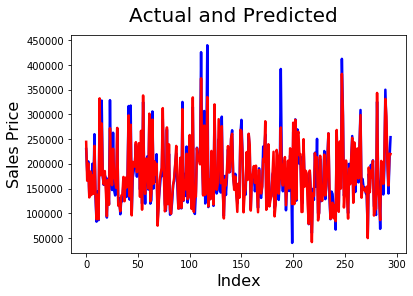

In [53]:
# Ridge Regression with all features: Actual vs Predicted
c = [i for i in range(0,y_test.shape[0],1)]
fig = plt.figure()
plt.plot(c, y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c, y_test_pred_ridge, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=16)                               # X-label
plt.ylabel('Sales Price', fontsize=16)                         # Y-label

Text(0, 0.5, 'Sales Price')

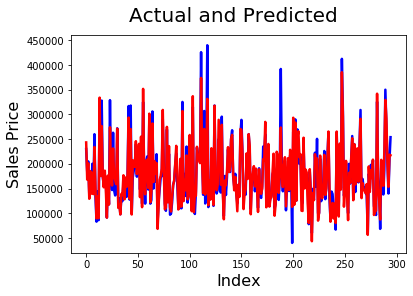

In [54]:
# Lasso Regression with all features: Actual vs Predicted
c = [i for i in range(0,y_test.shape[0],1)]
fig = plt.figure()
plt.plot(c, y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c, y_test_pred_lasso, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=16)                               # X-label
plt.ylabel('Sales Price', fontsize=16)                         # Y-label





## Conclusion

In [55]:
print("Since the model accuracy on test and train set for all three models above are similar, we would chose the simpler model.")
print("Simple Linear Regression model is fairly complex, hence we would not consider that.")
print("Ridge Regression model is fairly complex, hence we would not consider that.")
print("Optimum value of lambda for Ridge Regression is 4")
print("Lasso Regression model is simpler, hence we would consider that, since most co-efficients are zero.")
print("Optimum value of lambda for Lasso Regression is 50")
print("Most important 30 features that are affecting Sales pricing are:")
for k,v in sorted(list(zip(model_parameters,cols)), key=lambda x:abs(x[0]), reverse=True)[1:31]:
    print(f'{v:40}Score: {k}')


Since the model accuracy on test and train set for all three models above are similar, we would chose the simpler model.
Simple Linear Regression model is fairly complex, hence we would not consider that.
Ridge Regression model is fairly complex, hence we would not consider that.
Optimum value of lambda for Ridge Regression is 4
Lasso Regression model is simpler, hence we would consider that, since most co-efficients are zero.
Optimum value of lambda for Lasso Regression is 50
Most important 30 features that are affecting Sales pricing are:
OverallQual_9                           Score: 44090.81
OverallQual_10                          Score: 28811.319
SaleCondition_Alloca                    Score: -28616.24
Neighborhood_StoneBr                    Score: 27458.272
Functional_Mod                          Score: -27408.595
Neighborhood_Crawfor                    Score: 23028.136
Neighborhood_MeadowV                    Score: -22777.991
KitchenQual_TA                          Score: -19807

### Web App

In [56]:
# Preparing Test and Train Set



y = df_data.loc[:, out_col]
X = df_data[["MasVnrArea","LotArea","OverallQual_8","OverallCond_3"]]



# scale
scaler = StandardScaler()
scaler.fit(X)



# split 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size = 0.3,
random_state = 1)

In [57]:
df_data

,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,8450,2003,2003,196.0,706,0,150,856,856,854,...,0,0,0,0,1,0,0,0,1,0
2,11250,2001,2002,162.0,486,0,434,920,920,866,...,0,0,0,0,1,0,0,0,1,0
4,14260,2000,2000,350.0,655,0,490,1145,1145,1053,...,0,0,0,0,1,0,0,0,1,0
6,10084,2004,2005,186.0,1369,0,317,1686,1694,0,...,0,0,0,0,1,0,0,0,1,0
10,11200,1965,1965,0.0,906,0,134,1040,1040,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,9262,2008,2009,194.0,0,0,1573,1573,1578,0,...,0,0,1,0,0,0,0,0,0,1
1452,3675,2005,2005,80.0,547,0,0,547,1072,0,...,0,0,0,0,1,0,0,0,1,0
1454,7500,2004,2005,0.0,410,0,811,1221,1221,0,...,0,0,0,0,1,0,0,0,1,0
1455,7917,1999,2000,0.0,0,0,953,953,953,694,...,0,0,0,0,1,0,0,0,1,0


In [58]:
lasso = Lasso()

In [59]:
alpha =50
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train)

Lasso(alpha=50, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [60]:
@anvil.server.callable
def predict_HousePrice(OverallCond,LotArea,OverallQual,MasVnrArea):
    Predicted_Price = lasso.predict([[OverallCond,LotArea,OverallQual,MasVnrArea]])
    #print(Exterior1st_BrkFace)
    return ("Predicted_Price: " +str(Predicted_Price))
    #return("ghjj")


In [61]:
LassoRegressionmodel = lasso.predict([[7,60,7,6]])

In [62]:
print(LassoRegressionmodel)

[233948.93619002]


# Neural Architecture

In [5]:
import tensorflow as tf


In [6]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import itertools

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
import matplotlib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

tf.logging.set_verbosity(tf.logging.INFO)
sess = tf.InteractiveSession()

train = pd.read_csv('C:\\Users\\Welcome\\Downloads\\train.csv')
print('Shape of the train data with all features:', train.shape)
train = train.select_dtypes(exclude=['object'])
print("")
print('Shape of the train data with numerical features:', train.shape)
train.drop('Id',axis = 1, inplace = True)
train.fillna(0,inplace=True)

test = pd.read_csv('C:\\Users\\Welcome\\Desktop\\test.csv')
test = test.select_dtypes(exclude=['object'])
ID = test.Id
test.fillna(0,inplace=True)
test.drop('Id',axis = 1, inplace = True)

print("")
print("List of features contained our dataset:",list(train.columns))


Shape of the train data with all features: (1460, 81)

Shape of the train data with numerical features: (1460, 38)

List of features contained our dataset: ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [7]:
from sklearn.ensemble import IsolationForest

clf = IsolationForest(max_samples = 100, random_state = 42)
clf.fit(train)
y_noano = clf.predict(train)
y_noano = pd.DataFrame(y_noano, columns = ['Top'])
y_noano[y_noano['Top'] == 1].index.values

train = train.iloc[y_noano[y_noano['Top'] == 1].index.values]
train.reset_index(drop = True, inplace = True)
print("Number of Outliers:", y_noano[y_noano['Top'] == -1].shape[0])
print("Number of rows without outliers:", train.shape[0])

Number of Outliers: 146
Number of rows without outliers: 1314


In [8]:
train.head(10)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
5,50,85.0,14115,5,5,1993,1995,0.0,732,0,...,40,30,0,320,0,0,700,10,2009,143000
6,20,75.0,10084,8,5,2004,2005,186.0,1369,0,...,255,57,0,0,0,0,0,8,2007,307000
7,50,51.0,6120,7,5,1931,1950,0.0,0,0,...,90,0,205,0,0,0,0,4,2008,129900
8,190,50.0,7420,5,6,1939,1950,0.0,851,0,...,0,4,0,0,0,0,0,1,2008,118000
9,20,70.0,11200,5,5,1965,1965,0.0,906,0,...,0,0,0,0,0,0,0,2,2008,129500


In [9]:
import warnings
warnings.filterwarnings('ignore')

col_train = list(train.columns)
col_train_bis = list(train.columns)

col_train_bis.remove('SalePrice')

mat_train = np.matrix(train)
mat_test  = np.matrix(test)
mat_new = np.matrix(train.drop('SalePrice',axis = 1))
mat_y = np.array(train.SalePrice).reshape((1314,1))

prepro_y = MinMaxScaler()
prepro_y.fit(mat_y)

prepro = MinMaxScaler()
prepro.fit(mat_train)

prepro_test = MinMaxScaler()
prepro_test.fit(mat_new)

train = pd.DataFrame(prepro.transform(mat_train),columns = col_train)
test  = pd.DataFrame(prepro_test.transform(mat_test),columns = col_train_bis)

train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,0.235294,0.207668,0.062802,0.625,0.428571,0.953488,0.883333,0.12250,0.416274,0.0,...,0.000000,0.167582,0.000000,0.0,0.0,0.0,0.0,0.090909,0.50,0.403057
1,0.000000,0.255591,0.072904,0.500,0.857143,0.744186,0.433333,0.00000,0.576651,0.0,...,0.404891,0.000000,0.000000,0.0,0.0,0.0,0.0,0.363636,0.25,0.340220
2,0.235294,0.217252,0.087396,0.625,0.428571,0.937984,0.866667,0.10125,0.286557,0.0,...,0.000000,0.115385,0.000000,0.0,0.0,0.0,0.0,0.727273,0.50,0.437966
3,0.294118,0.191693,0.072464,0.625,0.428571,0.271318,0.333333,0.00000,0.127358,0.0,...,0.000000,0.096154,0.824242,0.0,0.0,0.0,0.0,0.090909,0.00,0.243639
4,0.235294,0.268371,0.113835,0.750,0.428571,0.930233,0.833333,0.21875,0.386203,0.0,...,0.260870,0.230769,0.000000,0.0,0.0,0.0,0.0,1.000000,0.50,0.499638


In [10]:
# List of features
COLUMNS = col_train
FEATURES = col_train_bis
LABEL = "SalePrice"

# Columns for tensorflow
feature_cols = [tf.contrib.layers.real_valued_column(k) for k in FEATURES]

# Training set and Prediction set with the features to predict
training_set = train[COLUMNS]
prediction_set = train.SalePrice

# Train and Test 
x_train, x_test, y_train, y_test = train_test_split(training_set[FEATURES] , prediction_set, test_size=0.33, random_state=42)
y_train = pd.DataFrame(y_train, columns = [LABEL])
training_set = pd.DataFrame(x_train, columns = FEATURES).merge(y_train, left_index = True, right_index = True)
training_set.head()

# Training for submission
training_sub = training_set[col_train]

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



In [11]:
# Same thing but for the test set
y_test = pd.DataFrame(y_test, columns = [LABEL])
testing_set = pd.DataFrame(x_test, columns = FEATURES).merge(y_test, left_index = True, right_index = True)
testing_set.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
1232,0.235294,0.239617,0.074221,0.625,0.571429,0.914729,0.800000,0.00000,0.574882,0.0,...,0.343750,0.467033,0.0,0.0,0.0,0.0,0.000000,0.454545,0.00,0.556191
76,0.352941,0.000000,0.063505,0.625,0.428571,0.891473,0.766667,0.01375,0.000000,0.0,...,0.163043,0.197802,0.0,0.0,0.0,0.0,0.045161,0.363636,0.75,0.309966
962,0.176471,0.159744,0.055205,0.375,0.142857,0.527132,0.000000,0.00000,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.636364,0.00,0.130767
433,0.588235,0.102236,0.028107,0.500,0.428571,0.914729,0.800000,0.07250,0.528892,0.0,...,0.000000,0.343407,0.0,0.0,0.0,0.0,0.000000,0.363636,0.00,0.299493
1110,0.823529,0.115016,0.011665,0.625,0.428571,0.953488,0.883333,0.06625,0.000000,0.0,...,0.000000,0.074176,0.0,0.0,0.0,0.0,0.000000,0.454545,1.00,0.326257


### Deep Neural Network for continuous features

In [15]:
# Model
tf.logging.set_verbosity(tf.logging.ERROR)
regressor = tf.contrib.learn.DNNRegressor(feature_columns=feature_cols, 
                                          activation_fn = tf.nn.relu, hidden_units=[200, 100, 50, 25, 12])#,
                                         #optimizer = tf.train.GradientDescentOptimizer( learning_rate= 0.1 ))

In [16]:
# Reset the index of training
training_set.reset_index(drop = True, inplace =True)

In [18]:
  def input_fn(data_set, pred = False):
    
    if pred == False:
        
        feature_cols = {k: tf.constant(data_set[k].values) for k in FEATURES}
        labels = tf.constant(data_set[LABEL].values)
        
        return feature_cols, labels

    if pred == True:
        feature_cols = {k: tf.constant(data_set[k].values) for k in FEATURES}
        
        return feature_cols

In [19]:
# Deep Neural Network Regressor with the training set which contain the data split by train test split
regressor.fit(input_fn=lambda: input_fn(training_set), steps=2000)

DNNRegressor(params={'head': <tensorflow.contrib.learn.python.learn.estimators.head._RegressionHead object at 0x00000039EA7478C8>, 'hidden_units': [200, 100, 50, 25, 12], 'feature_columns': (_RealValuedColumn(column_name='MSSubClass', dimension=1, default_value=None, dtype=tf.float32, normalizer=None), _RealValuedColumn(column_name='LotFrontage', dimension=1, default_value=None, dtype=tf.float32, normalizer=None), _RealValuedColumn(column_name='LotArea', dimension=1, default_value=None, dtype=tf.float32, normalizer=None), _RealValuedColumn(column_name='OverallQual', dimension=1, default_value=None, dtype=tf.float32, normalizer=None), _RealValuedColumn(column_name='OverallCond', dimension=1, default_value=None, dtype=tf.float32, normalizer=None), _RealValuedColumn(column_name='YearBuilt', dimension=1, default_value=None, dtype=tf.float32, normalizer=None), _RealValuedColumn(column_name='YearRemodAdd', dimension=1, default_value=None, dtype=tf.float32, normalizer=None), _RealValuedColumn

In [20]:
# Evaluation on the test set created by train_test_split
ev = regressor.evaluate(input_fn=lambda: input_fn(testing_set), steps=1)

In [21]:
# Display the score on the testing set
# 0.002X in average
loss_score1 = ev["loss"]
print("Final Loss on the testing set: {0:f}".format(loss_score1))

Final Loss on the testing set: 0.002281


In [23]:
# Predictions
y = regressor.predict(input_fn=lambda: input_fn(testing_set))
predictions = list(itertools.islice(y, testing_set.shape[0]))

In [30]:
predictions = pd.DataFrame(prepro_y.inverse_transform(np.array(predictions).reshape(434,1)),columns = ['Prediction'])

In [31]:
y_predict = regressor.predict(input_fn=lambda: input_fn(test, pred = True))

def to_submit(pred_y,name_out):
    y_predict = list(itertools.islice(pred_y, test.shape[0]))
    y_predict = pd.DataFrame(prepro_y.inverse_transform(np.array(y_predict).reshape(len(y_predict),1)), columns = ['SalePrice'])
    y_predict = y_predict.join(ID)
    y_predict.to_csv(name_out + '.csv',index=False)
    
to_submit(y_predict, "submission_continuous")

### Leaky Relu

In [24]:
def leaky_relu(x):
    return tf.nn.relu(x) - 0.01 * tf.nn.relu(-x)

In [25]:
# Model
regressor = tf.contrib.learn.DNNRegressor(feature_columns=feature_cols, 
                                          activation_fn = leaky_relu, hidden_units=[200, 100, 50, 25, 12])
    
# Deep Neural Network Regressor with the training set which contain the data split by train test split
regressor.fit(input_fn=lambda: input_fn(training_set), steps=2000)

# Evaluation on the test set created by train_test_split
ev = regressor.evaluate(input_fn=lambda: input_fn(testing_set), steps=1)

In [26]:
# Display the score on the testing set
# 0.002X in average
loss_score2 = ev["loss"]
print("Final Loss on the testing set with Leaky Relu: {0:f}".format(loss_score2))

Final Loss on the testing set with Leaky Relu: 0.002621


In [32]:
# Predictions
y_predict = regressor.predict(input_fn=lambda: input_fn(test, pred = True))
to_submit(y_predict, "Leaky_relu")

In [33]:
# Model
regressor = tf.contrib.learn.DNNRegressor(feature_columns=feature_cols, 
                                          activation_fn = tf.nn.elu, hidden_units=[200, 100, 50, 25, 12])
    
# Deep Neural Network Regressor with the training set which contain the data split by train test split
regressor.fit(input_fn=lambda: input_fn(training_set), steps=2000)

# Evaluation on the test set created by train_test_split
ev = regressor.evaluate(input_fn=lambda: input_fn(testing_set), steps=1)

loss_score3 = ev["loss"]

In [34]:
print("Final Loss on the testing set with Elu: {0:f}".format(loss_score3))

Final Loss on the testing set with Elu: 0.002854


In [35]:
# Predictions
y_predict = regressor.predict(input_fn=lambda: input_fn(test, pred = True))
to_submit(y_predict, "Elu")

### Deep Neural Network for continuous and categorical features

In [36]:
# Import and split
train = pd.read_csv('C:\\Users\\Welcome\\Downloads\\train.csv')
train.drop('Id',axis = 1, inplace = True)
train_numerical = train.select_dtypes(exclude=['object'])
train_numerical.fillna(0,inplace = True)
train_categoric = train.select_dtypes(include=['object'])
train_categoric.fillna('NONE',inplace = True)
train = train_numerical.merge(train_categoric, left_index = True, right_index = True) 

test = pd.read_csv('C:\\Users\\Welcome\\Desktop\\test.csv')
ID = test.Id
test.drop('Id',axis = 1, inplace = True)
test_numerical = test.select_dtypes(exclude=['object'])
test_numerical.fillna(0,inplace = True)
test_categoric = test.select_dtypes(include=['object'])
test_categoric.fillna('NONE',inplace = True)
test = test_numerical.merge(test_categoric, left_index = True, right_index = True) 

In [37]:
# Removie the outliers
from sklearn.ensemble import IsolationForest

clf = IsolationForest(max_samples = 100, random_state = 42)
clf.fit(train_numerical)
y_noano = clf.predict(train_numerical)
y_noano = pd.DataFrame(y_noano, columns = ['Top'])
y_noano[y_noano['Top'] == 1].index.values

train_numerical = train_numerical.iloc[y_noano[y_noano['Top'] == 1].index.values]
train_numerical.reset_index(drop = True, inplace = True)

train_categoric = train_categoric.iloc[y_noano[y_noano['Top'] == 1].index.values]
train_categoric.reset_index(drop = True, inplace = True)

train = train.iloc[y_noano[y_noano['Top'] == 1].index.values]
train.reset_index(drop = True, inplace = True)

In [38]:
col_train_num = list(train_numerical.columns)
col_train_num_bis = list(train_numerical.columns)

col_train_cat = list(train_categoric.columns)

col_train_num_bis.remove('SalePrice')

mat_train = np.matrix(train_numerical)
mat_test  = np.matrix(test_numerical)
mat_new = np.matrix(train_numerical.drop('SalePrice',axis = 1))
mat_y = np.array(train.SalePrice)

prepro_y = MinMaxScaler()
prepro_y.fit(mat_y.reshape(1314,1))

prepro = MinMaxScaler()
prepro.fit(mat_train)

prepro_test = MinMaxScaler()
prepro_test.fit(mat_new)

train_num_scale = pd.DataFrame(prepro.transform(mat_train),columns = col_train)
test_num_scale  = pd.DataFrame(prepro_test.transform(mat_test),columns = col_train_bis)

In [39]:
train[col_train_num] = pd.DataFrame(prepro.transform(mat_train),columns = col_train_num)
test[col_train_num_bis]  = test_num_scale

In [40]:
# List of features
COLUMNS = col_train_num
FEATURES = col_train_num_bis
LABEL = "SalePrice"

FEATURES_CAT = col_train_cat

engineered_features = []

for continuous_feature in FEATURES:
    engineered_features.append(
        tf.contrib.layers.real_valued_column(continuous_feature))

for categorical_feature in FEATURES_CAT:
    sparse_column = tf.contrib.layers.sparse_column_with_hash_bucket(
        categorical_feature, hash_bucket_size=1000)

    engineered_features.append(tf.contrib.layers.embedding_column(sparse_id_column=sparse_column, dimension=16,combiner="sum"))
                                 
# Training set and Prediction set with the features to predict
training_set = train[FEATURES + FEATURES_CAT]
prediction_set = train.SalePrice

# Train and Test 
x_train, x_test, y_train, y_test = train_test_split(training_set[FEATURES + FEATURES_CAT] ,
                                                    prediction_set, test_size=0.33, random_state=42)
y_train = pd.DataFrame(y_train, columns = [LABEL])
training_set = pd.DataFrame(x_train, columns = FEATURES + FEATURES_CAT).merge(y_train, left_index = True, right_index = True)

# Training for submission
training_sub = training_set[FEATURES + FEATURES_CAT]
testing_sub = test[FEATURES + FEATURES_CAT]

In [41]:
# Same thing but for the test set
y_test = pd.DataFrame(y_test, columns = [LABEL])
testing_set = pd.DataFrame(x_test, columns = FEATURES + FEATURES_CAT).merge(y_test, left_index = True, right_index = True)

In [42]:
training_set[FEATURES_CAT] = training_set[FEATURES_CAT].applymap(str)
testing_set[FEATURES_CAT] = testing_set[FEATURES_CAT].applymap(str)

def input_fn_new(data_set, training = True):
    continuous_cols = {k: tf.constant(data_set[k].values) for k in FEATURES}
    
    categorical_cols = {k: tf.SparseTensor(
        indices=[[i, 0] for i in range(data_set[k].size)], values = data_set[k].values, dense_shape = [data_set[k].size, 1]) for k in FEATURES_CAT}

    # Merges the two dictionaries into one.
    feature_cols = dict(list(continuous_cols.items()) + list(categorical_cols.items()))
    
    if training == True:
        # Converts the label column into a constant Tensor.
        label = tf.constant(data_set[LABEL].values)

        # Returns the feature columns and the label.
        return feature_cols, label
    
    return feature_cols

# Model
regressor = tf.contrib.learn.DNNRegressor(feature_columns = engineered_features, 
                                          activation_fn = tf.nn.relu, hidden_units=[200, 100, 50, 25, 12])

In [43]:
categorical_cols = {k: tf.SparseTensor(indices=[[i, 0] for i in range(training_set[k].size)], values = training_set[k].values, dense_shape = [training_set[k].size, 1]) for k in FEATURES_CAT}

In [44]:
# Deep Neural Network Regressor with the training set which contain the data split by train test split
regressor.fit(input_fn = lambda: input_fn_new(training_set) , steps=2000)

DNNRegressor(params={'head': <tensorflow.contrib.learn.python.learn.estimators.head._RegressionHead object at 0x00000039F720BF88>, 'hidden_units': [200, 100, 50, 25, 12], 'feature_columns': (_RealValuedColumn(column_name='MSSubClass', dimension=1, default_value=None, dtype=tf.float32, normalizer=None), _RealValuedColumn(column_name='LotFrontage', dimension=1, default_value=None, dtype=tf.float32, normalizer=None), _RealValuedColumn(column_name='LotArea', dimension=1, default_value=None, dtype=tf.float32, normalizer=None), _RealValuedColumn(column_name='OverallQual', dimension=1, default_value=None, dtype=tf.float32, normalizer=None), _RealValuedColumn(column_name='OverallCond', dimension=1, default_value=None, dtype=tf.float32, normalizer=None), _RealValuedColumn(column_name='YearBuilt', dimension=1, default_value=None, dtype=tf.float32, normalizer=None), _RealValuedColumn(column_name='YearRemodAdd', dimension=1, default_value=None, dtype=tf.float32, normalizer=None), _RealValuedColumn

In [45]:
ev = regressor.evaluate(input_fn=lambda: input_fn_new(testing_set, training = True), steps=1)

In [46]:
loss_score4 = ev["loss"]
print("Final Loss on the testing set: {0:f}".format(loss_score4))

Final Loss on the testing set: 0.002007


In [47]:
list_score = [loss_score1, loss_score2, loss_score3, loss_score4]
list_model = ['Relu_cont', 'LRelu_cont', 'Elu_cont', 'Relu_cont_categ']

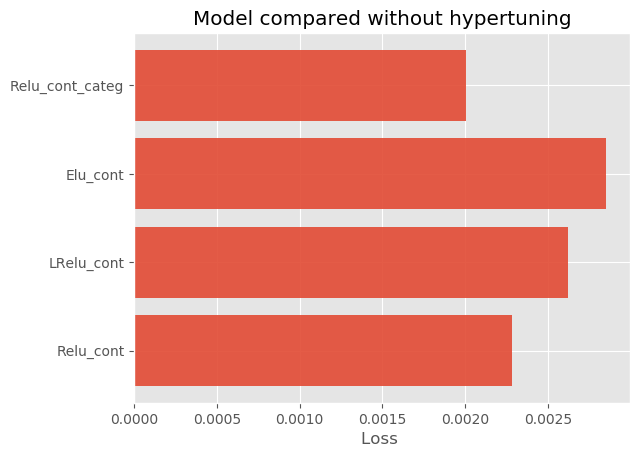

In [48]:
import matplotlib.pyplot as plt; plt.rcdefaults()

plt.style.use('ggplot')
objects = list_model
y_pos = np.arange(len(objects))
performance = list_score
 
plt.barh(y_pos, performance, align='center', alpha=0.9)
plt.yticks(y_pos, objects)
plt.xlabel('Loss ')
plt.title('Model compared without hypertuning')
 
plt.show()